# Setup

In [123]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os

# handle image display
from IPython.display import display, HTML
import base64
from pathlib import Path

sys.path.insert(0, os.path.abspath(os.path.join("..", "hammock_plot"))) # path to hammock_plot module
import hammock_plot

## Instructions:
When you have code that is logically correct, you can change GENERATE_EXPECTED to True to create baseline copies of the images for comparison
When you're running tests, set it to False to allow for side-by-side comparison.

In [124]:
GENERATE_EXPECTED = False 
# True: replaces reference images using current hammock_plot.py
# False: runs tests
# toggle on or off

EXPECTED_PATH=os.path.abspath("expected_plots")
RESULT_PATH=os.path.abspath("test_plots")
os.makedirs(RESULT_PATH, exist_ok=True) # make sure that the RESULT_PATH directory exists

Helper function to display results

In [125]:
# handle side-by-side comparison
def show_expected_vs_actual(title, filename):
    """
    Display two images side by side
    """
    def encode_image(path):
        path = Path(path)
        if not path.exists():
            return None
        with open(path, "rb") as f:
            data = f.read()
        return base64.b64encode(data).decode("utf-8")

    expected_file = os.path.join(EXPECTED_PATH, filename)
    result_file = os.path.join(RESULT_PATH, filename)

    expected_b64 = encode_image(expected_file)
    result_b64 = encode_image(result_file)

    
    if result_b64 is None:
        print(f"Error in hammock plot's save_path parameter (test_plots dir doesn't contain {filename})")
        return
    
    if expected_b64 is None:
        print(f"You have to generate expected results before running tests! (expected_plots dir doesn't contain {filename})")
        return

    html_content = f"""
    <div style="text-align: center; margin-bottom: 10px;">
        <h3>{title}</h3>
    </div>
    <div style="display: flex; flex-wrap: wrap; justify-content: center; gap: 10px; align-items: flex-start;">
        <div style="flex: 1 1 48%; text-align: center;">
            <div style="font-weight: bold;">Expected</div>
            <img src="data:image/png;base64,{expected_b64}" style="width: 100%; height: auto; border: 1px solid #ccc;">
        </div>
        <div style="flex: 1 1 48%; text-align: center;">
            <div style="font-weight: bold;">Actual</div>
            <img src="data:image/png;base64,{result_b64}" style="width: 100%; height: auto; border: 1px solid #ccc;">
        </div>
    </div>
    """

    display(HTML(html_content))

Dataframe set up

In [126]:
# set up dataframes
DATA_DIR = os.path.abspath(os.path.join("..", "data"))
df_asthma = pd.read_csv(os.path.join(DATA_DIR, "data_asthma.csv"))
df_diabetes = pd.read_csv(os.path.join(DATA_DIR, "data_diabetes.csv"))
df_asthma_2 = pd.read_csv(os.path.join(DATA_DIR, "data_asthma_2.csv")).dropna().iloc[:20, :] # trim so it runs faster
df_shakespeare = pd.read_csv(os.path.join(DATA_DIR, "data_shakespeare.csv"))

# Error handling tests

In [127]:
# error handling


# General tests
Test cases involving "general" hammock plot methods (following the categories in README.md)

## Var List


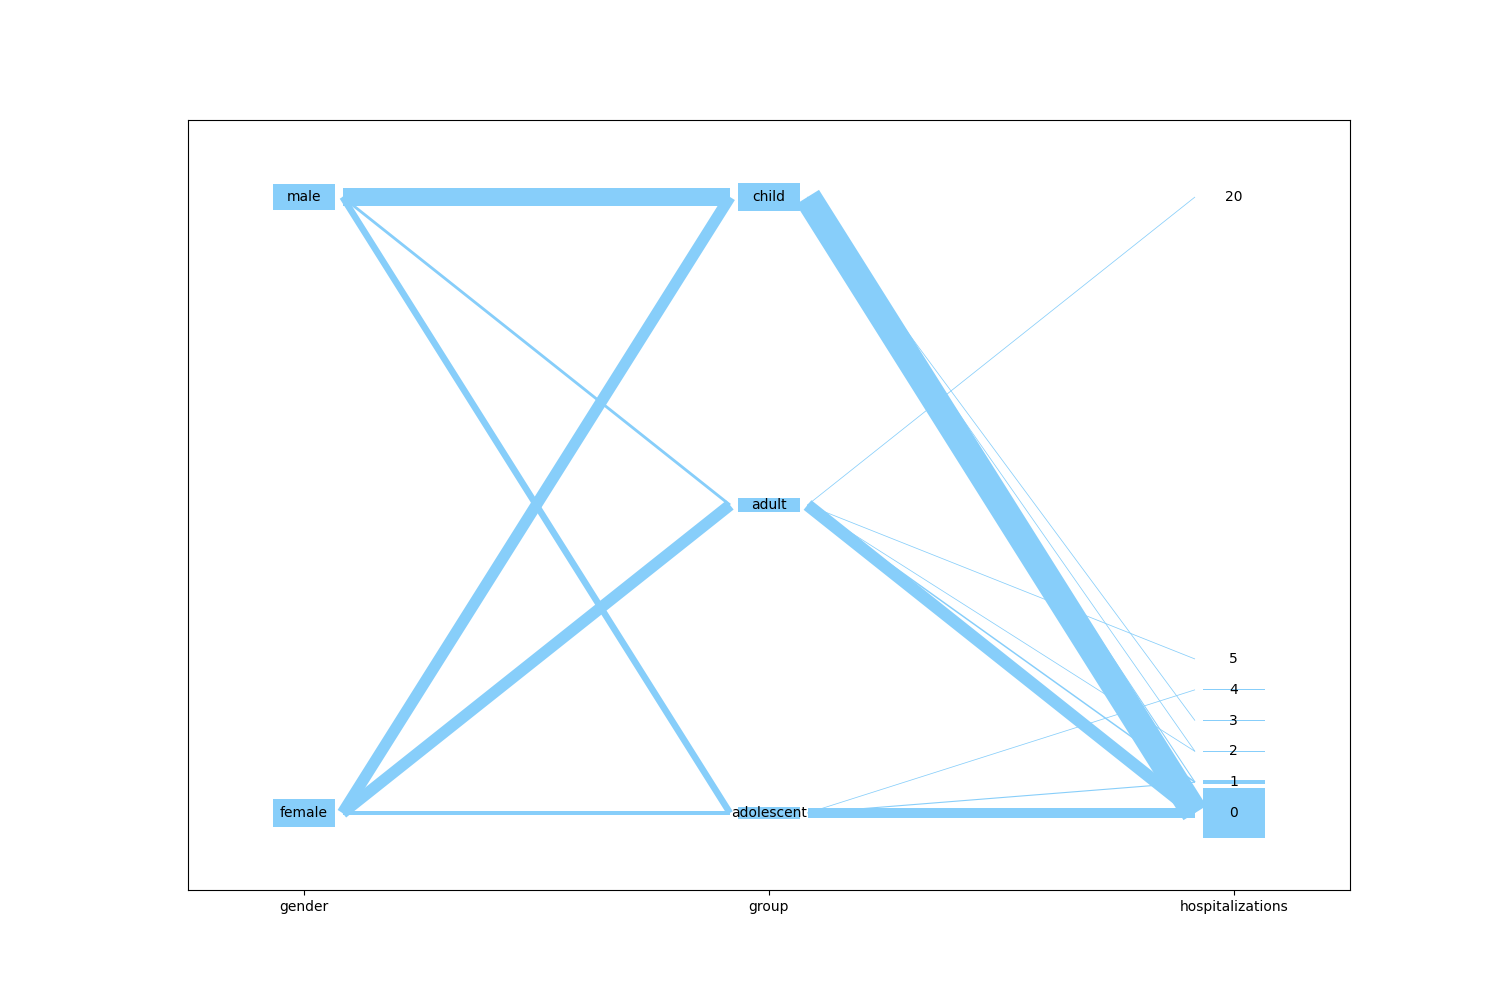
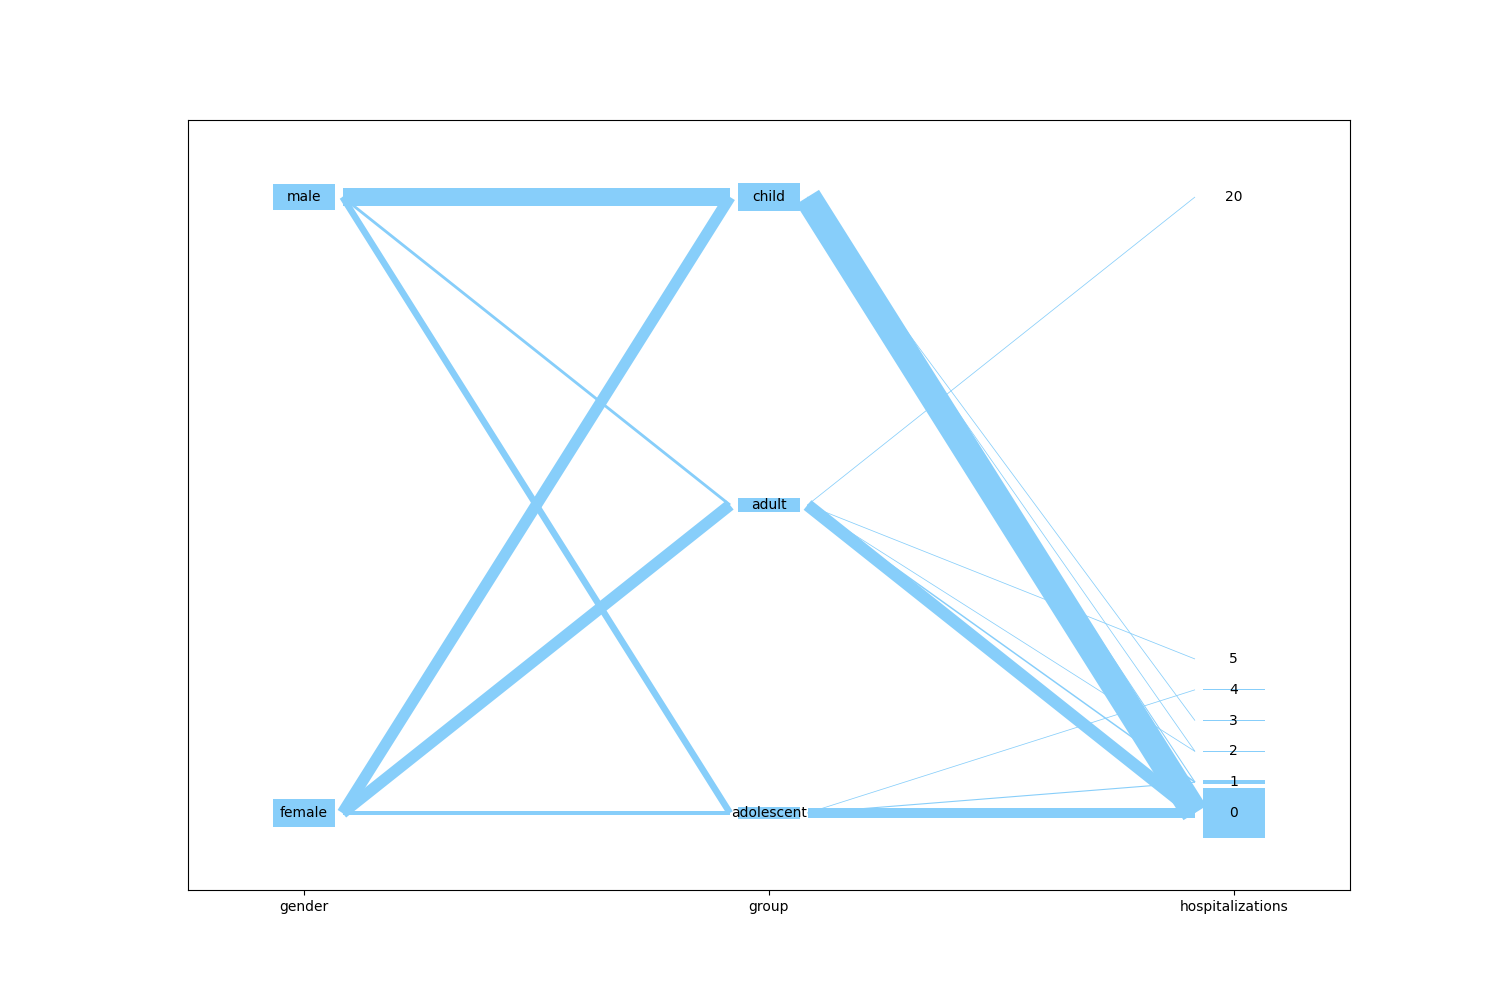

In [128]:
# general - var list
filename = "varlist.png"
var = ["gender", "group", "hospitalizations"]
df = df_asthma

hammock = hammock_plot.Hammock(df)
hammock.plot(
    var=var,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Variable List Test", filename)

## Value Ordering


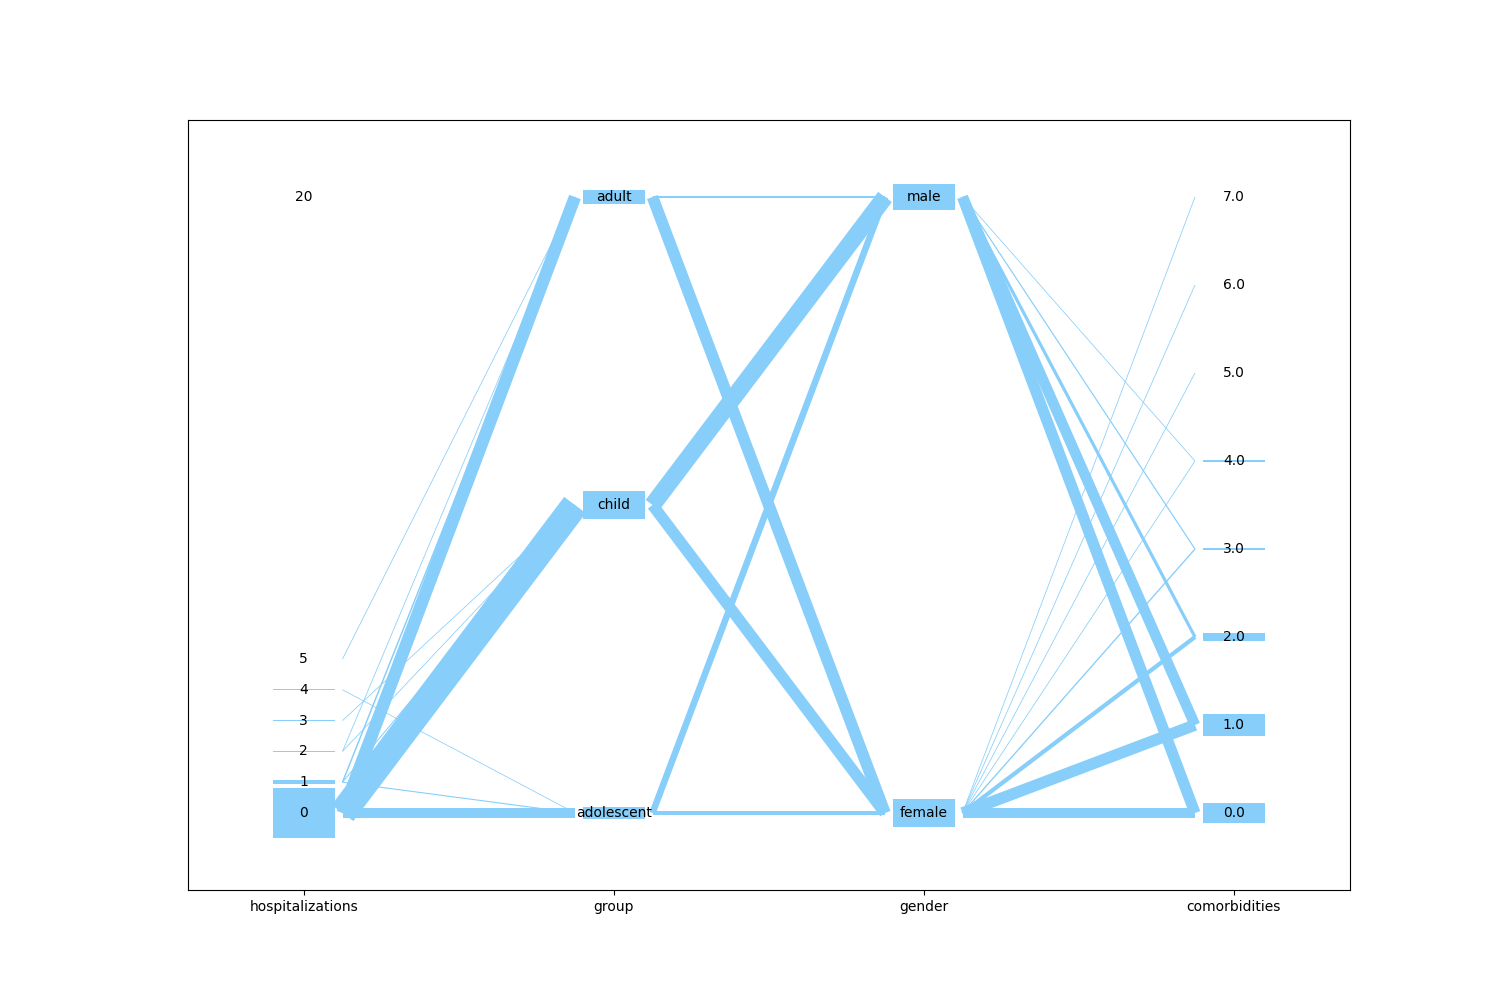
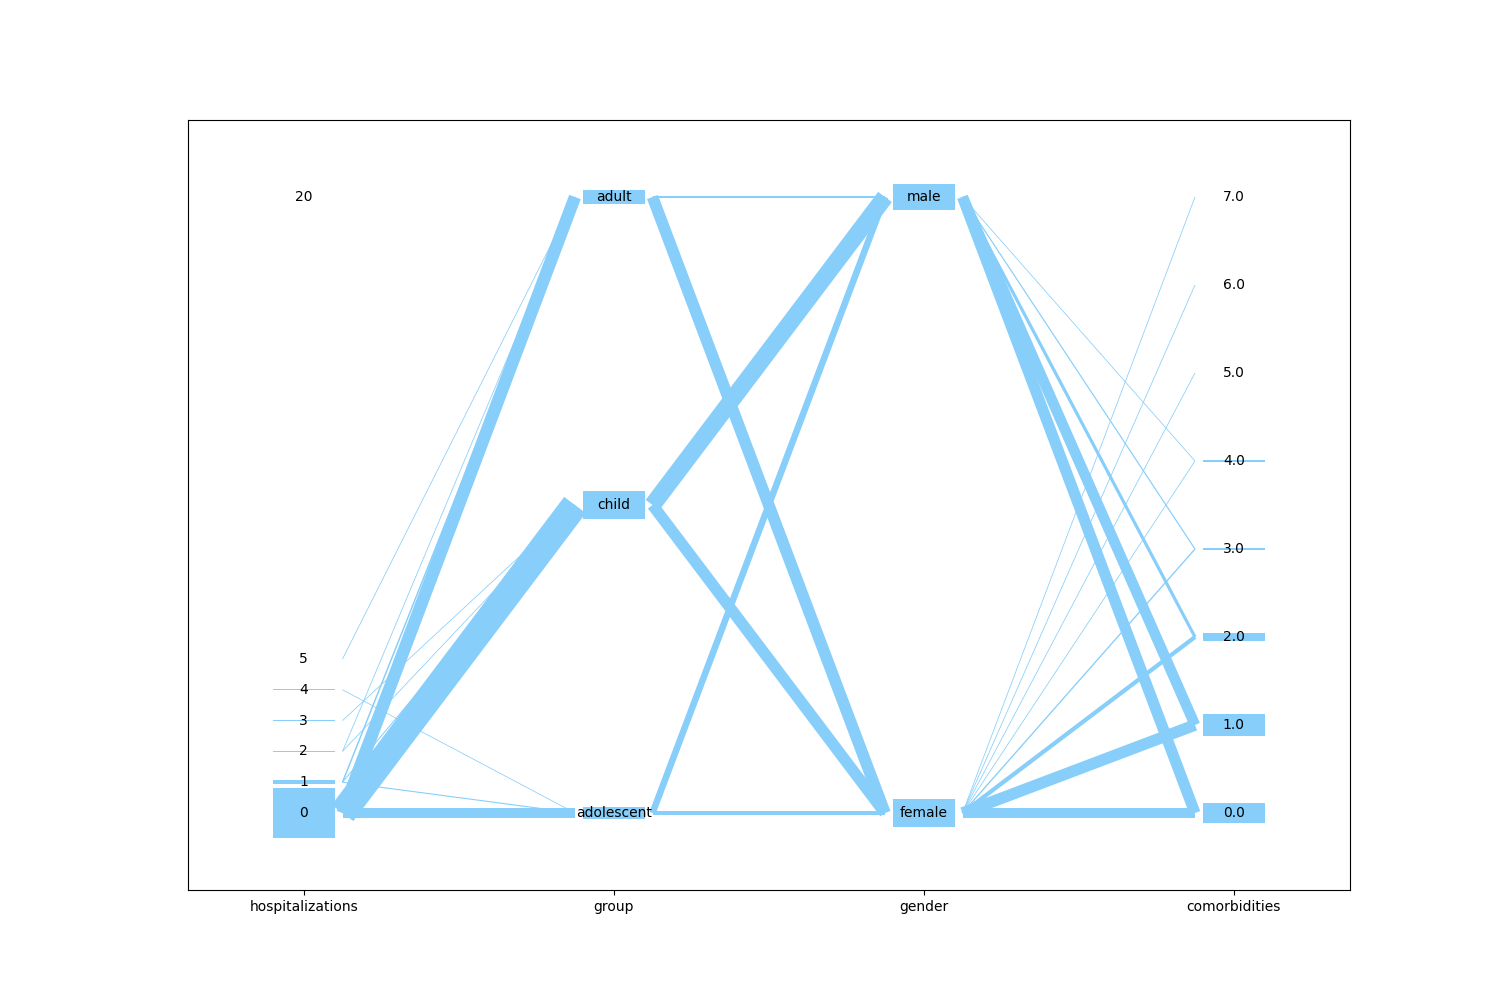

In [129]:
# general - value ordering
filename = "val_order.png"
value_order = {"group": {1.2: "child", -1:"adolescent", 5: "adult"}} # should this be allowed?
df = df_asthma
hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    value_order=value_order,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Value Order Test", filename)

## Missing Boolean


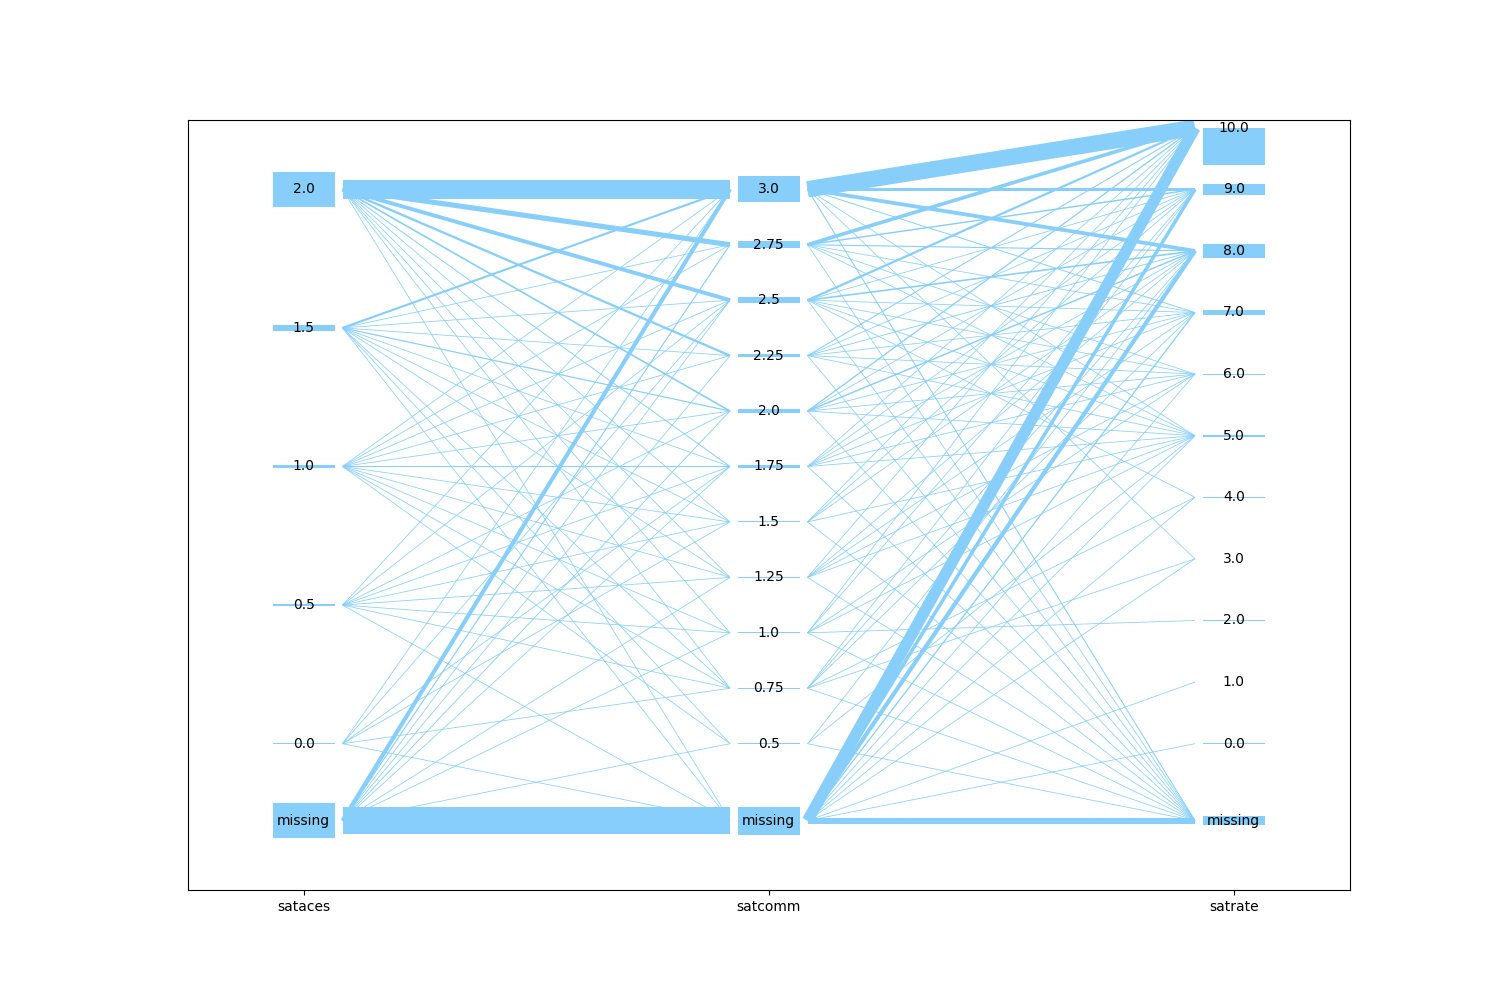
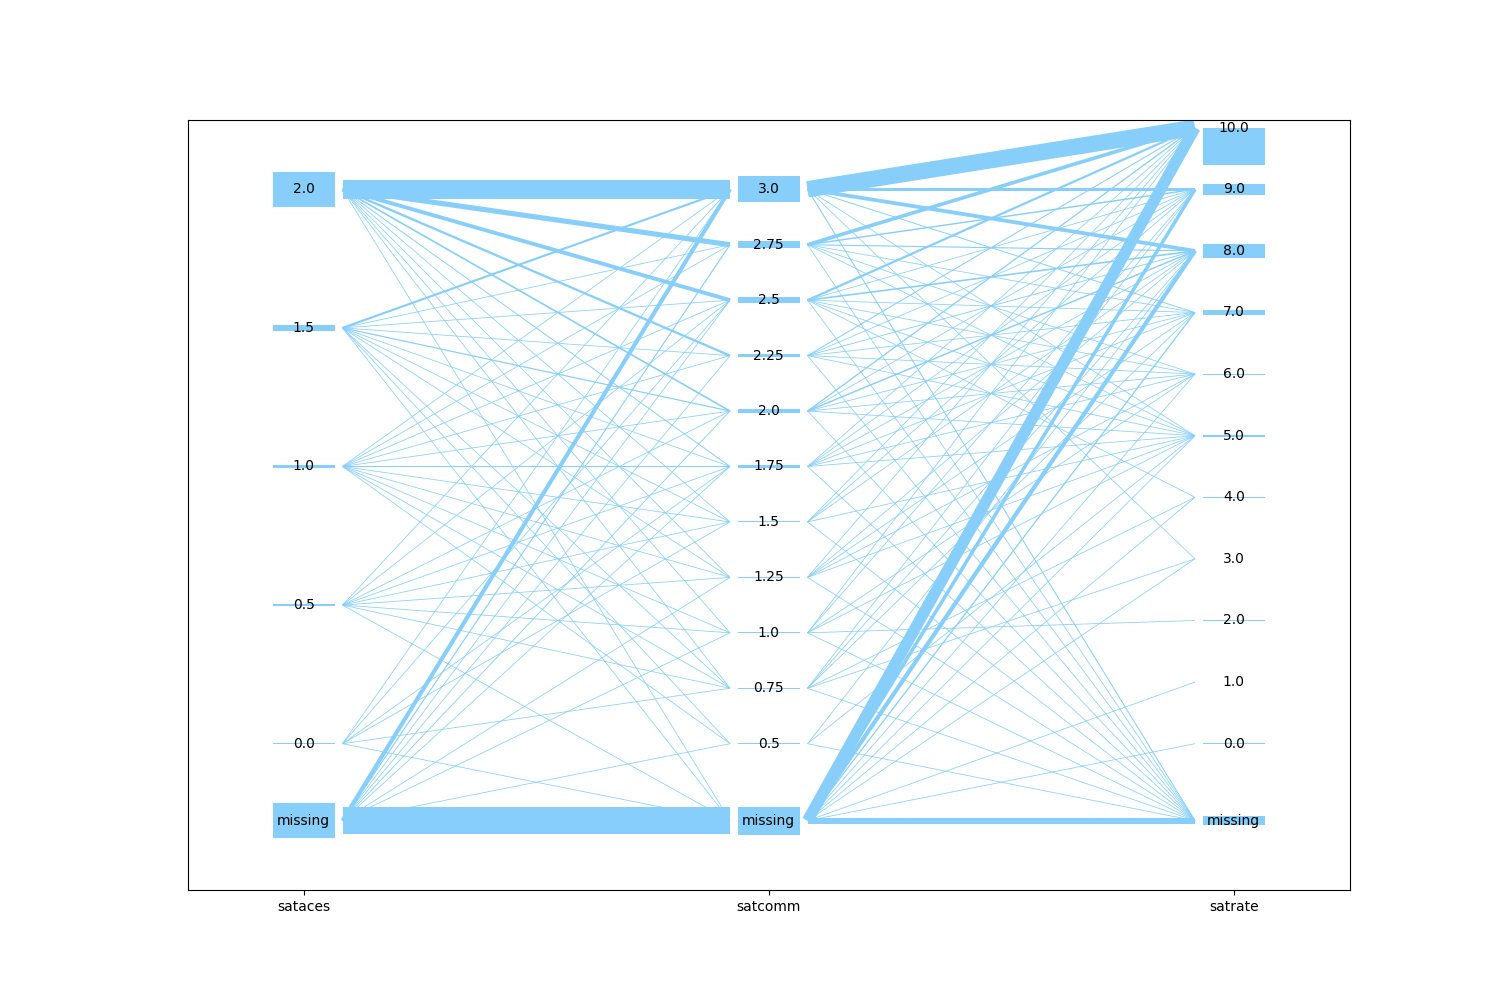

In [130]:
# general - missing boolean
filename = "missing_var.png"
df=df_diabetes

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    missing=True,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Missing Variable Test", filename)

## Labels off


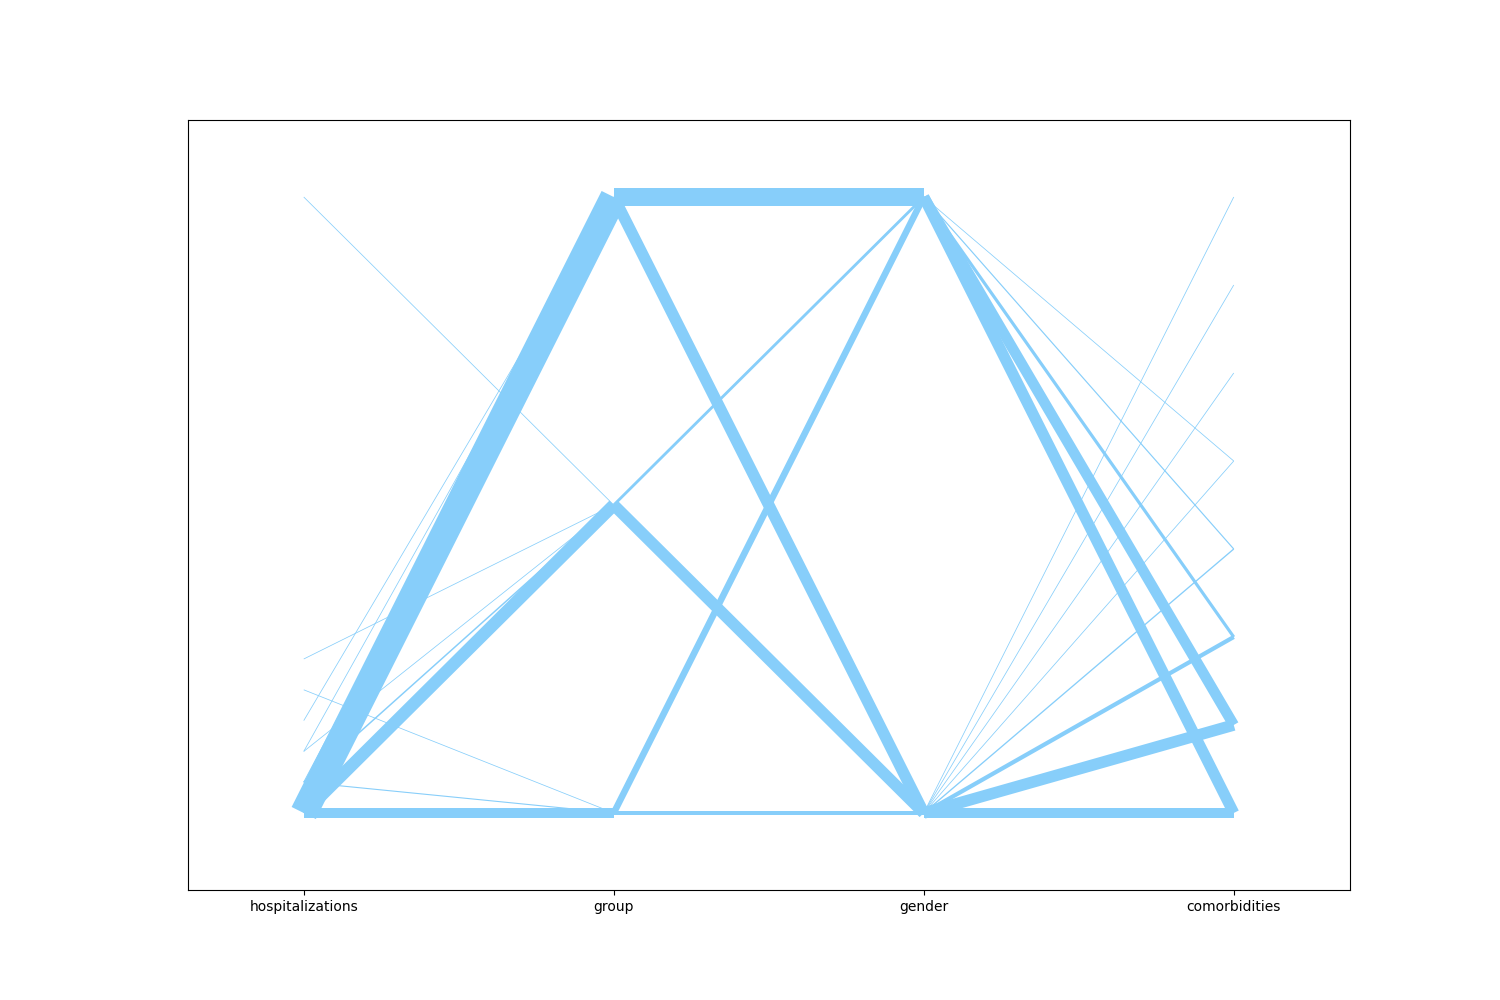
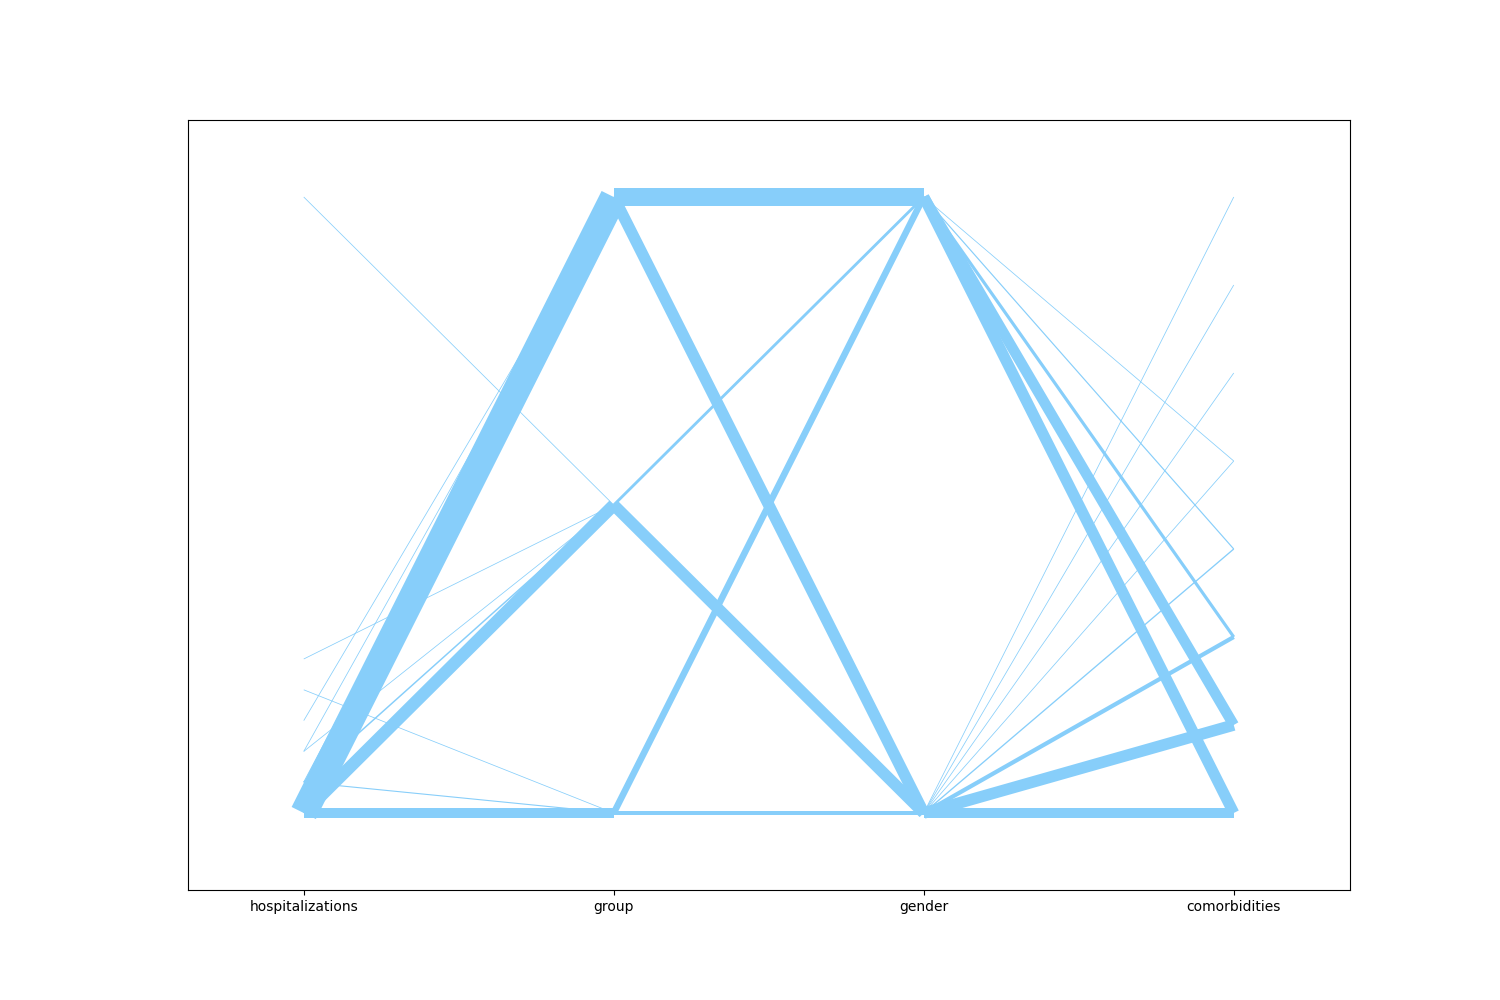

In [131]:
# general - label boolean
filename = "label_off.png"
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    label=False,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

# Highlight tests
Test cases involving "highlight" hammock plot methods (following the categories in README.md)

## Highlight categorical values


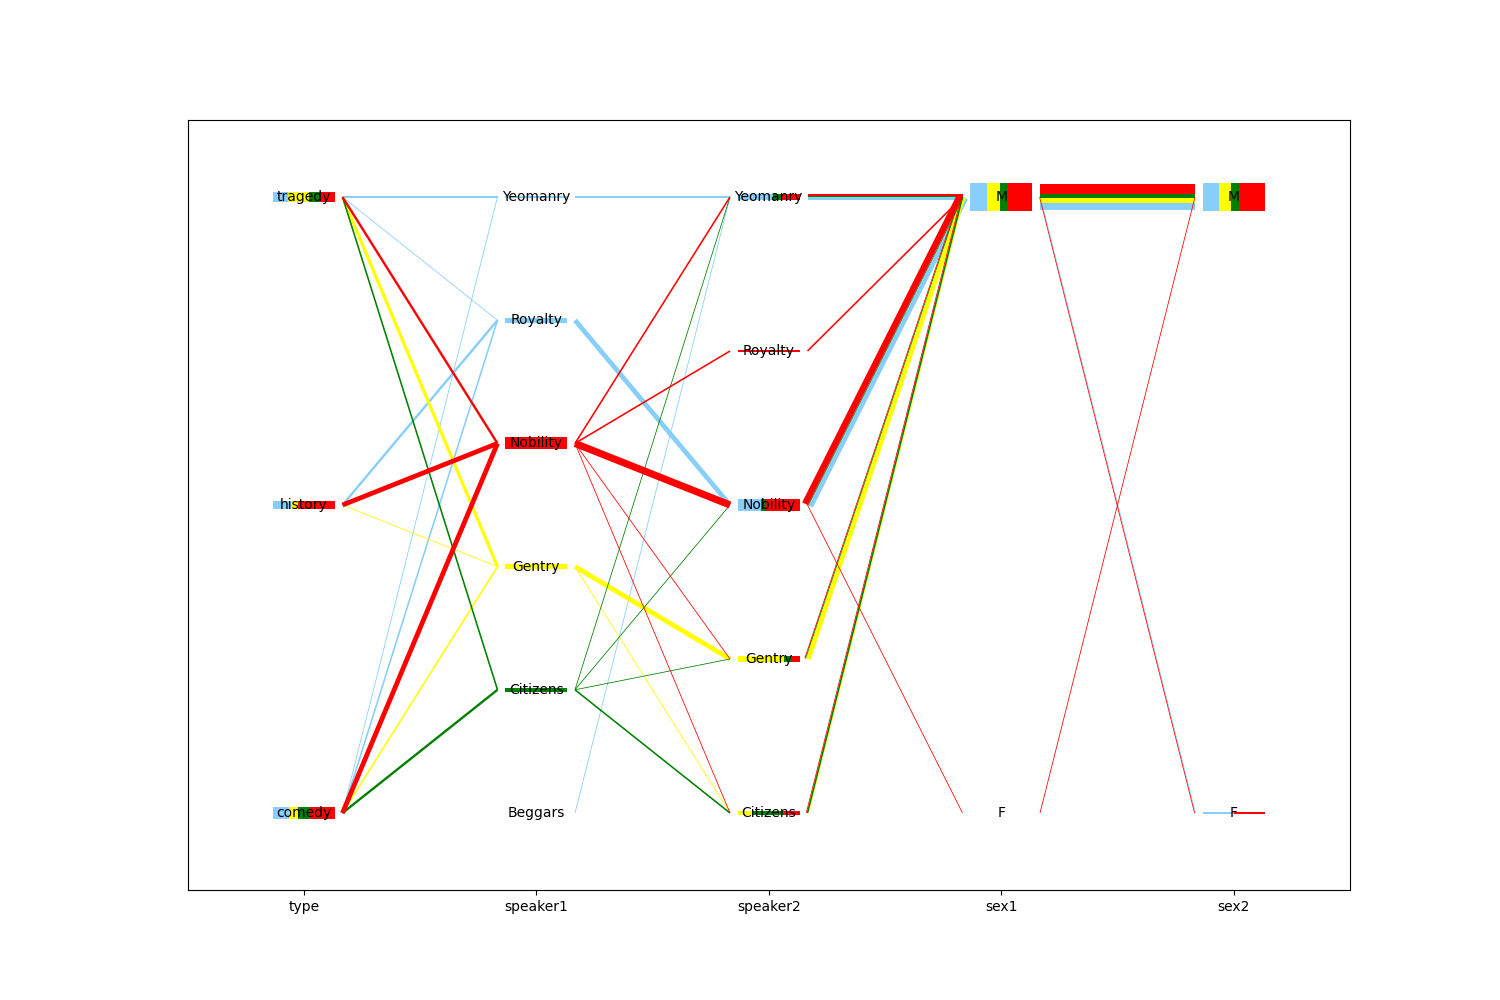
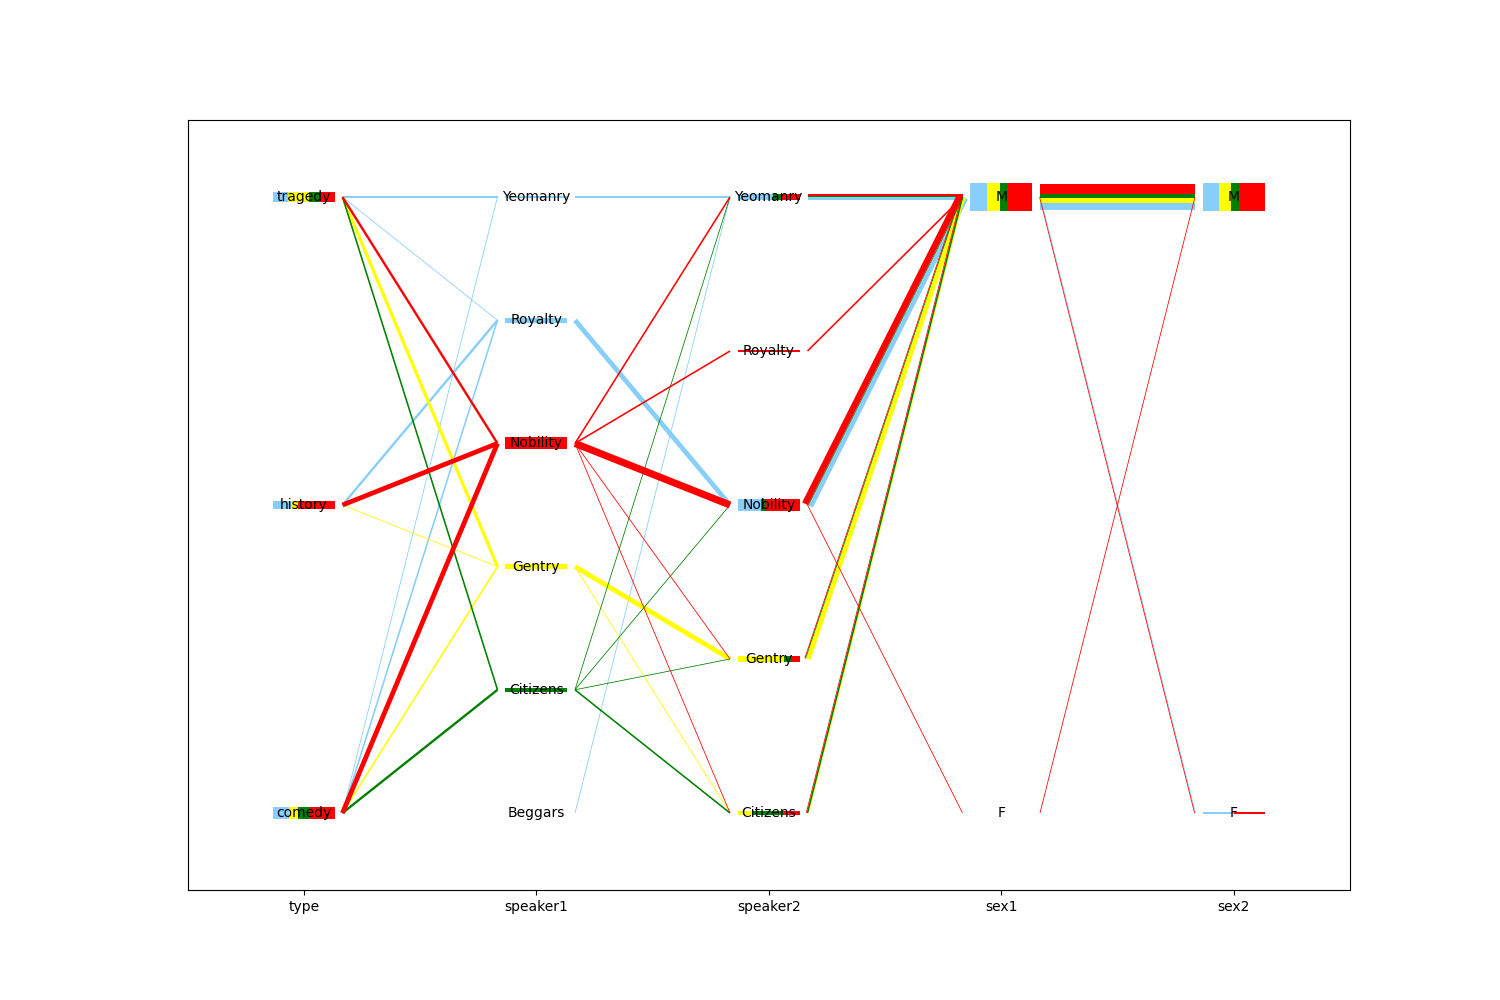

In [132]:
# highlight - value - categorical
filename = "highlight_var_categorical.png"
df = df_shakespeare

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= [item for item in list(df) if item != "play_name"],
    display_figure=False,
    hi_var="speaker1",
    hi_value=["Nobility","Citizens","Gentry"],
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Categorical Variables Test", filename)

## Highlight range of values


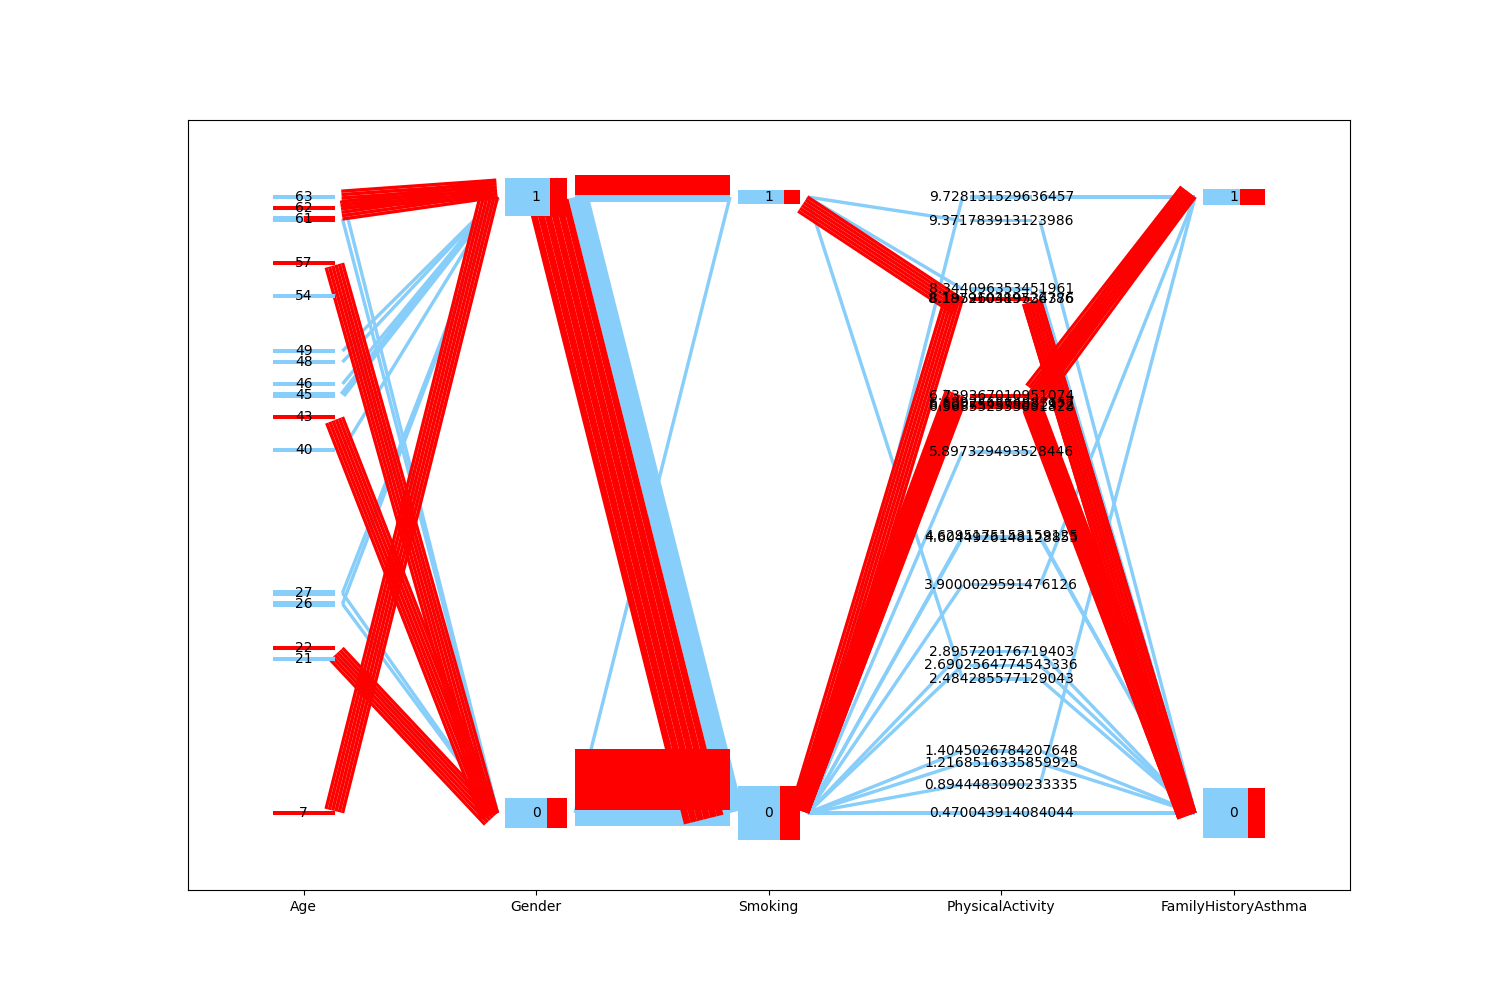
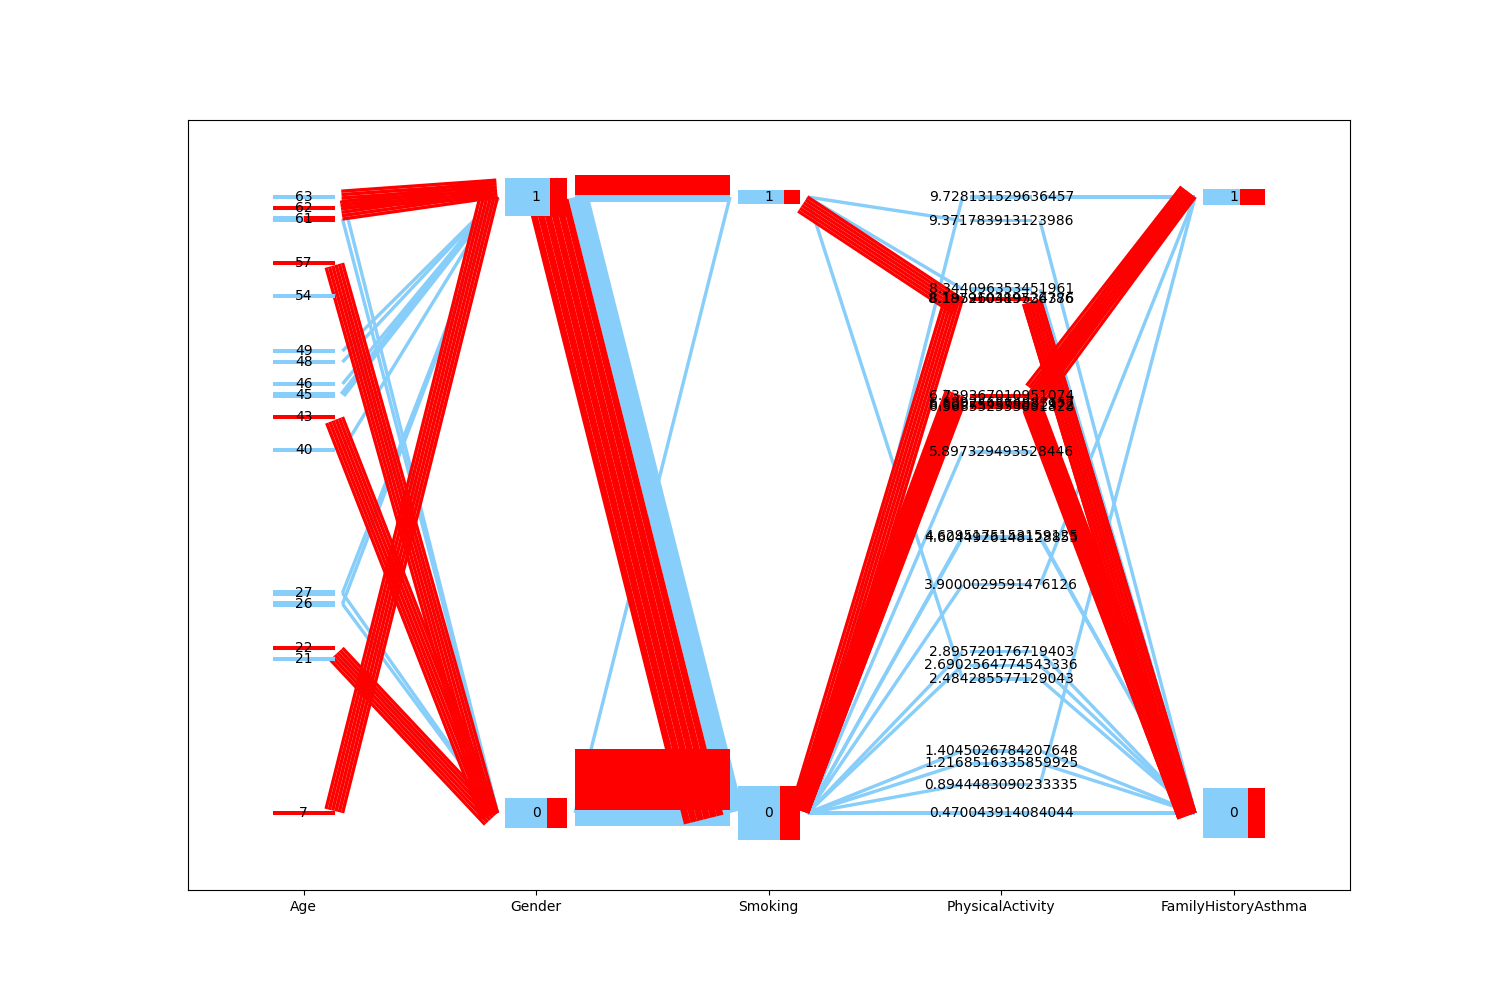

In [133]:
# highlight - value - expression
# NOTE: this is wrong - the values should be rounded but they're not being rounded.
# NOTE: bar size is also different from when the range is not highlighted.
filename = "highlight_var_range.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    hi_var="PhysicalActivity",
    hi_value="6.5<x<8.2",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Variable Range Test", filename)

## Highlight boxes (horizontal)


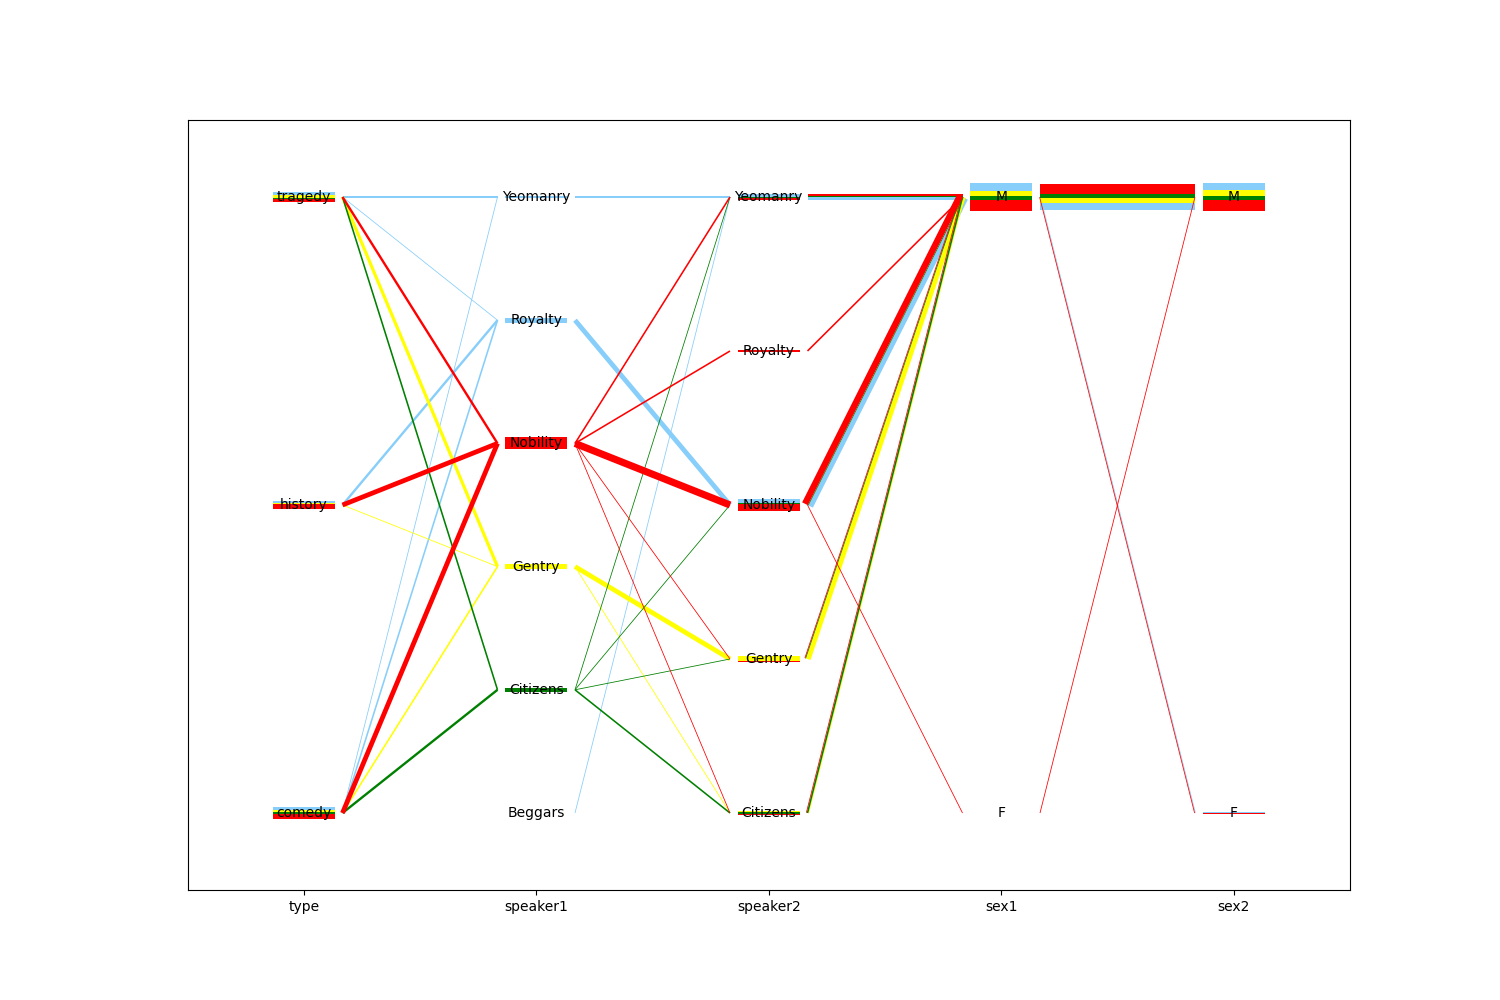
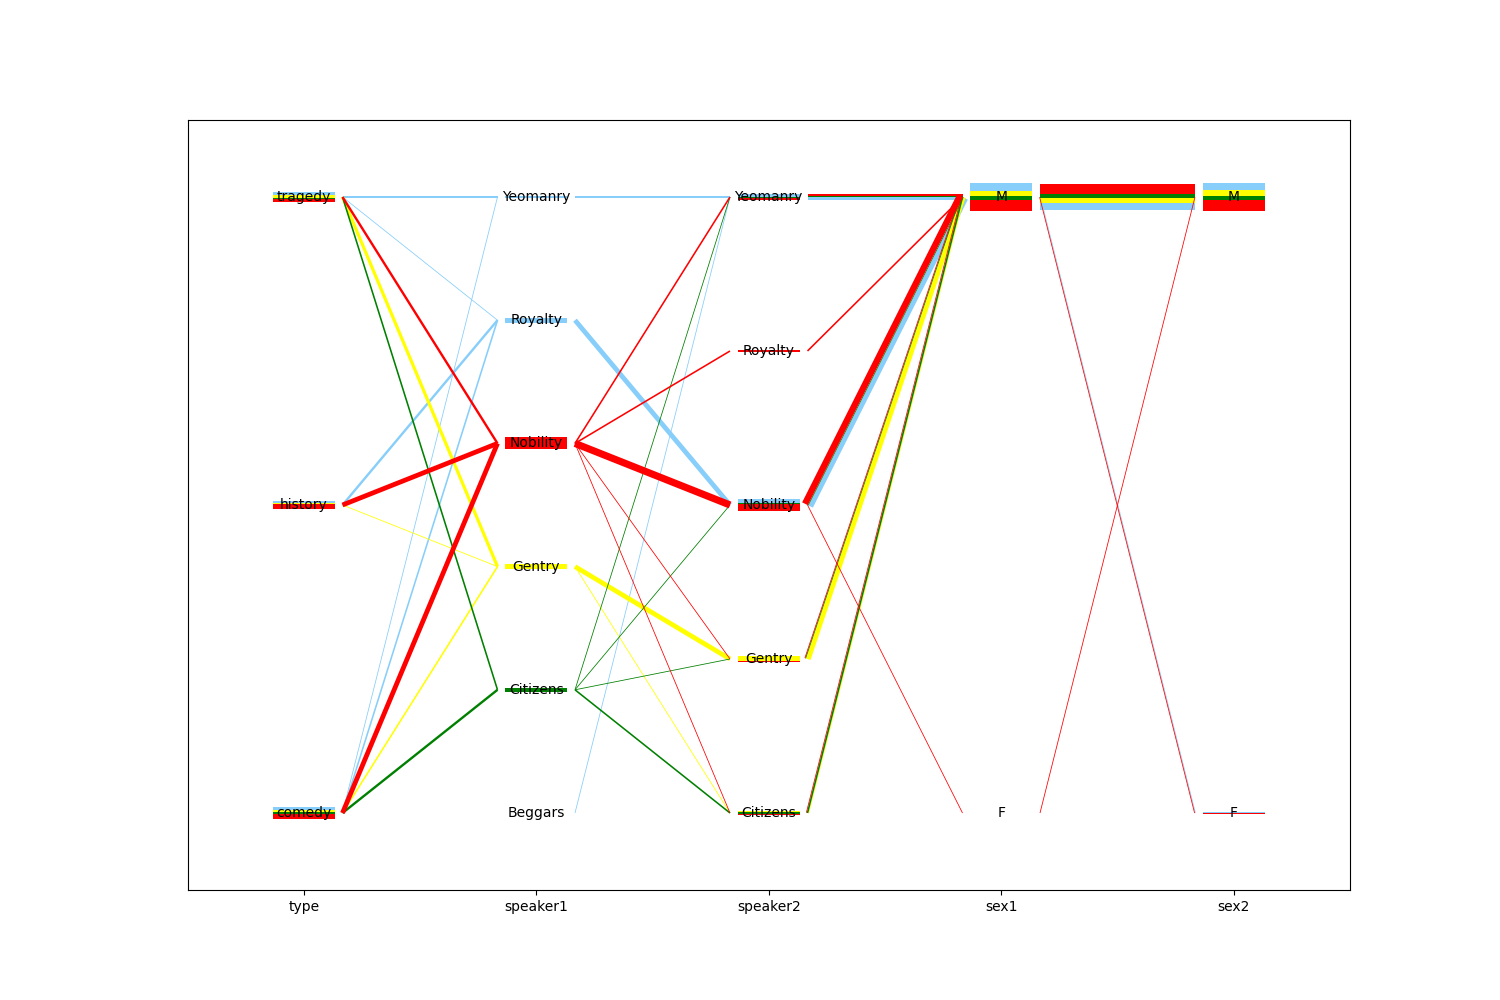

In [134]:
# highlight - horizontal
# NOTE: this is wrong - the values should be rounded but they're not being rounded.
filename = "highlight_horizontal.png"
df = df_shakespeare

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= [item for item in list(df) if item != "play_name"],
    display_figure=False,
    hi_var="speaker1",
    hi_value=["Nobility","Citizens","Gentry"],
    hi_box="horizontal",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Box = Horizontal Test", filename)

## Highlight missing variable


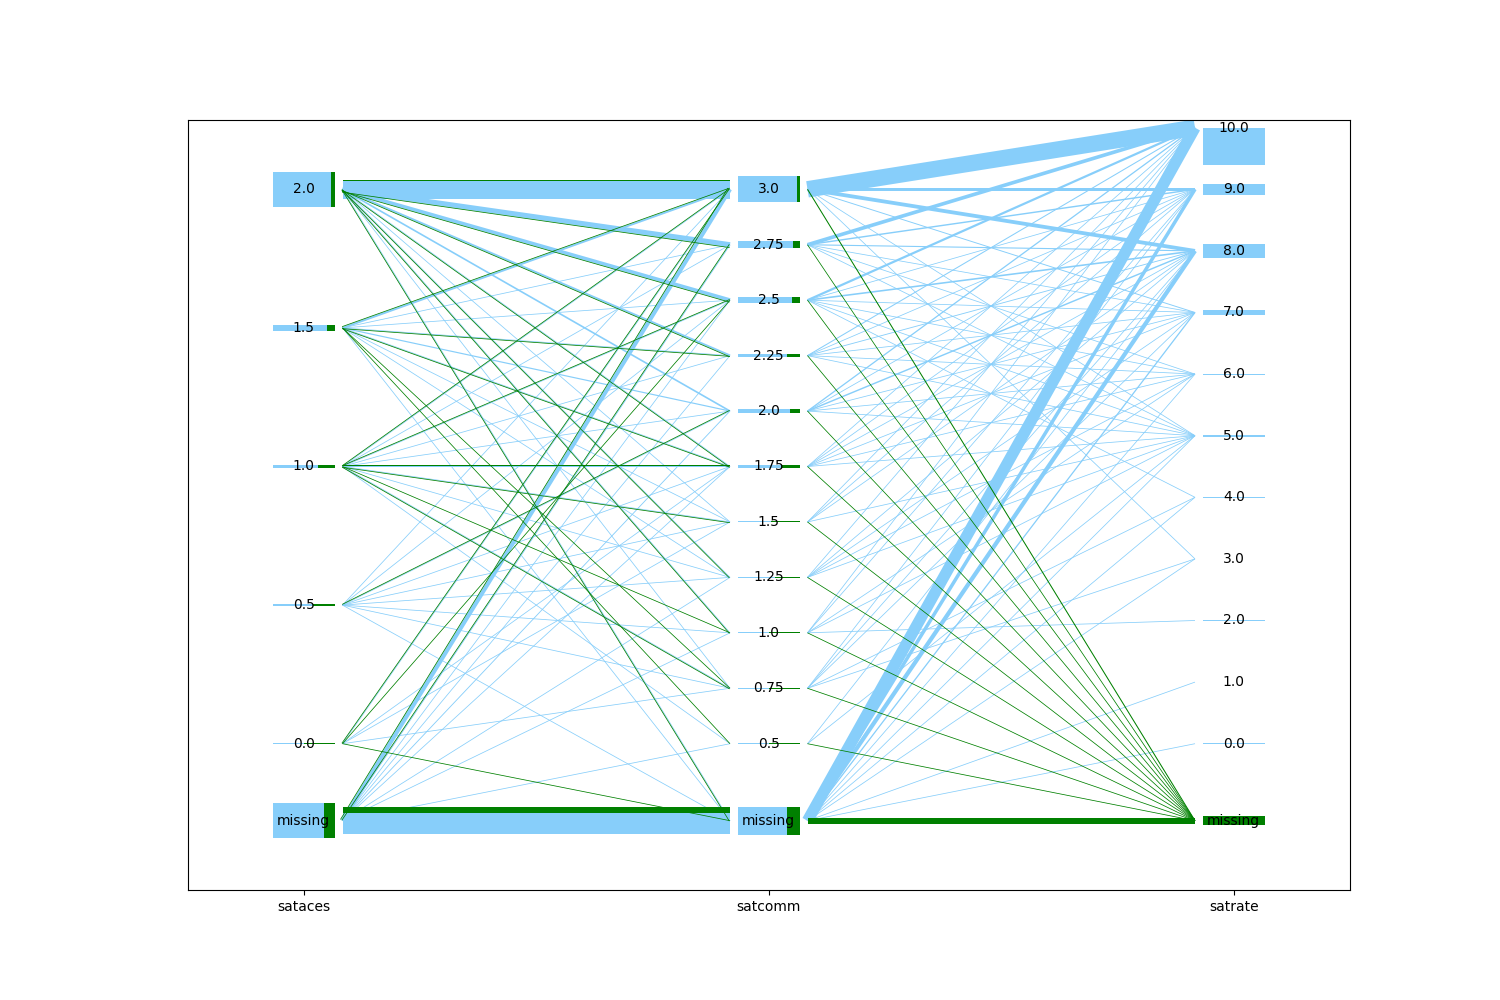
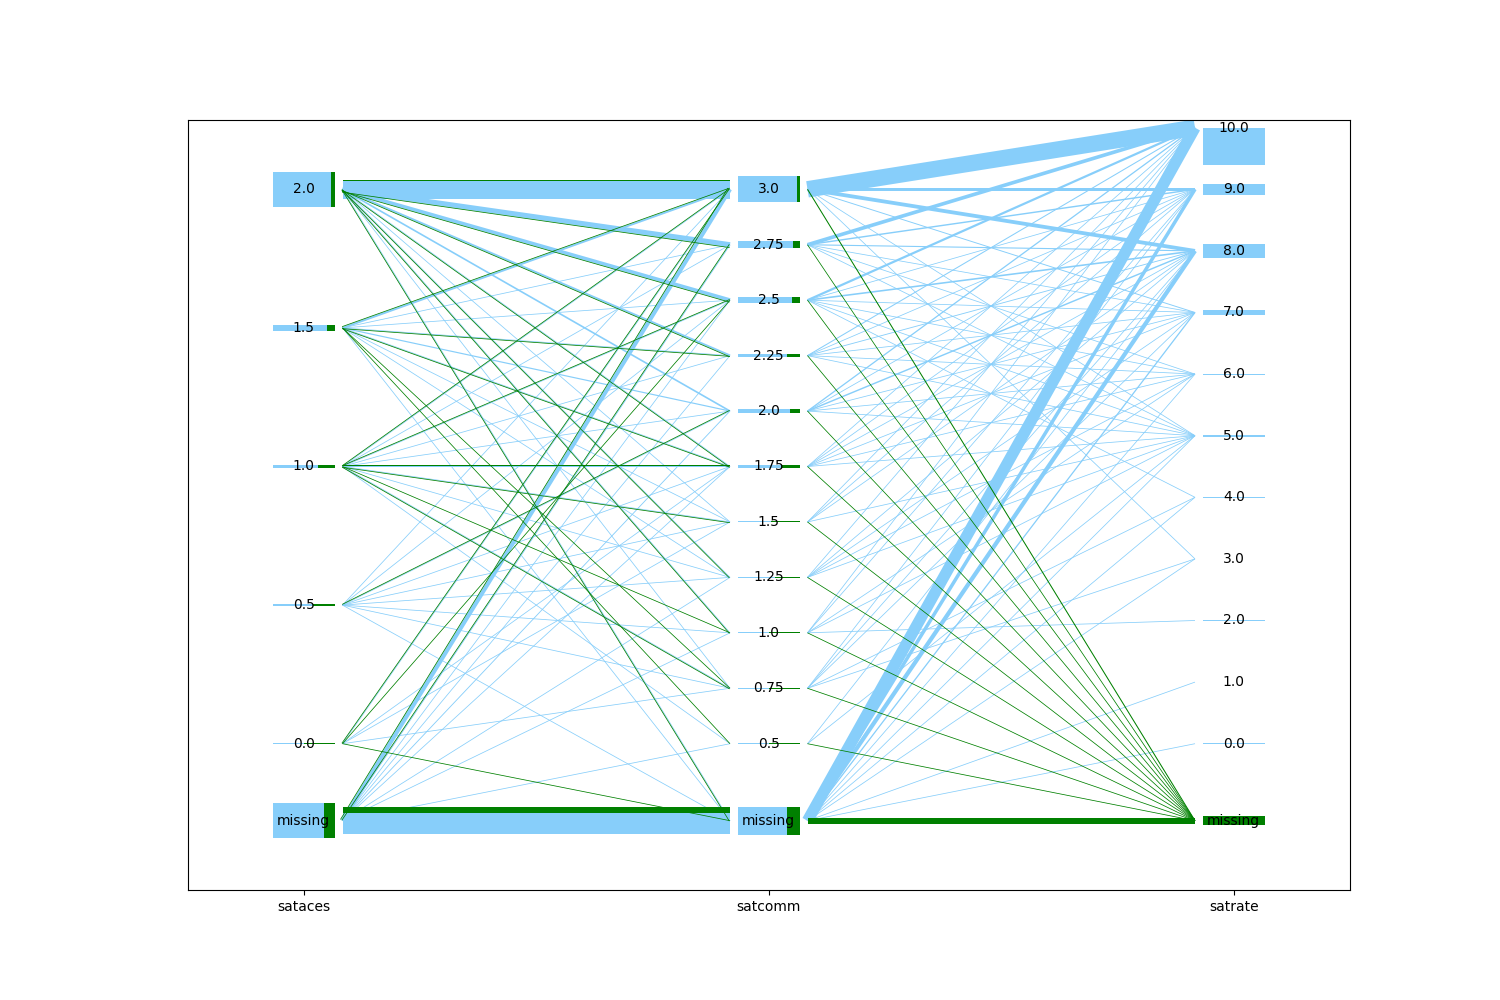

In [135]:
# highlight - missing = True
filename = "hi_missing.png"
df=df_diabetes

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    missing=True,
    display_figure=False,
    hi_var="satrate",
    hi_missing=True,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Missing Variable Test", filename)


## Custom highlight colour list


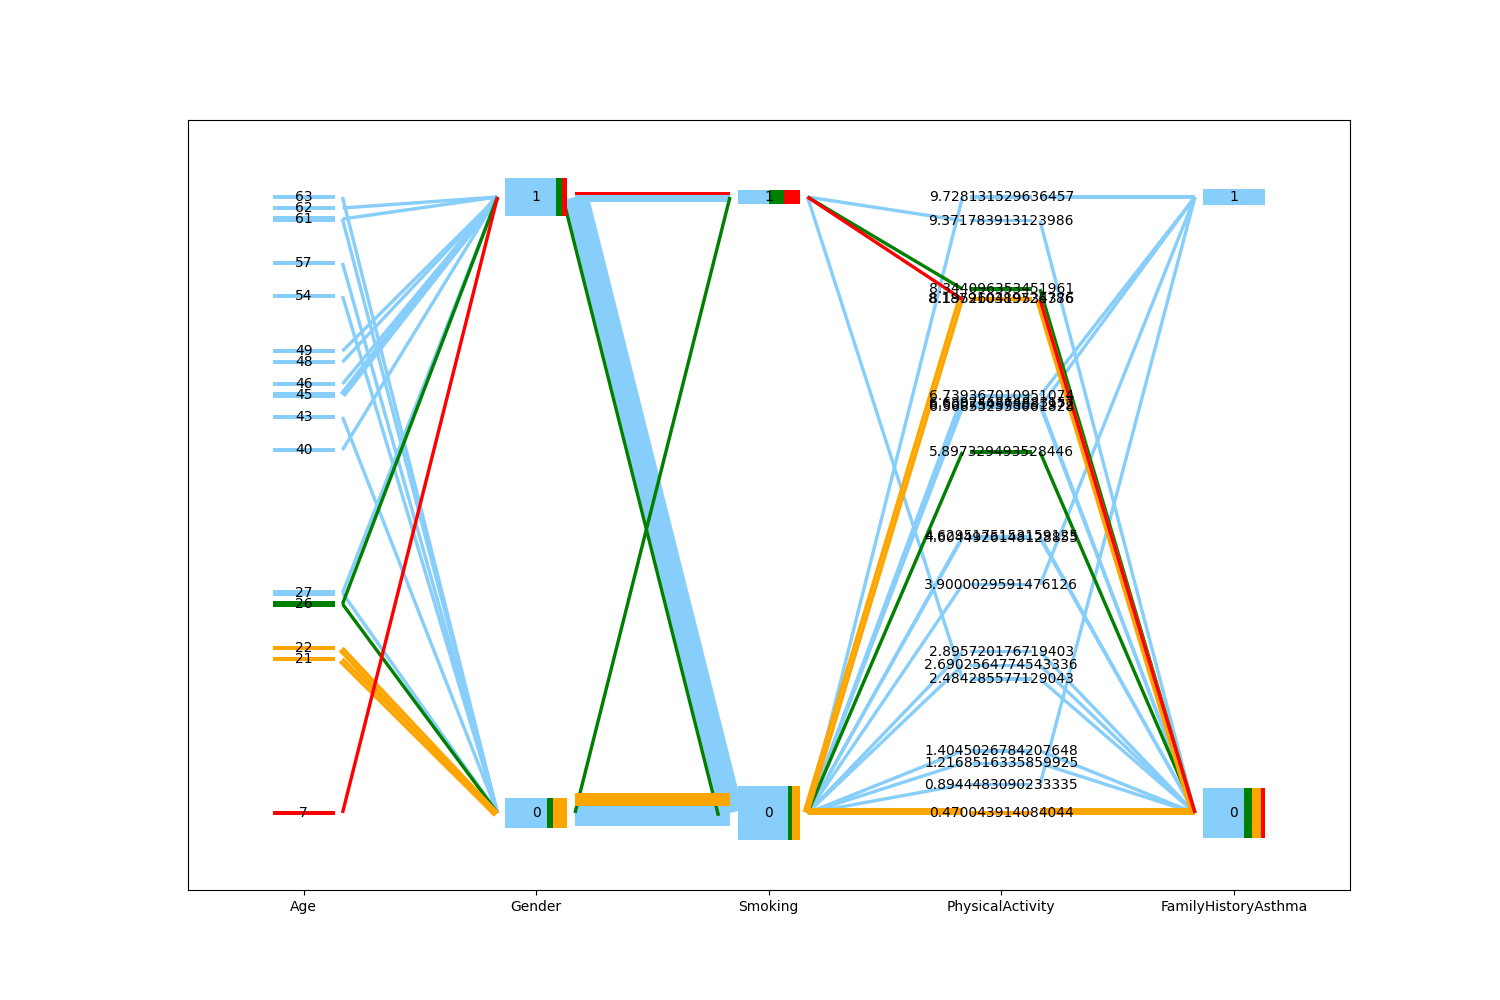
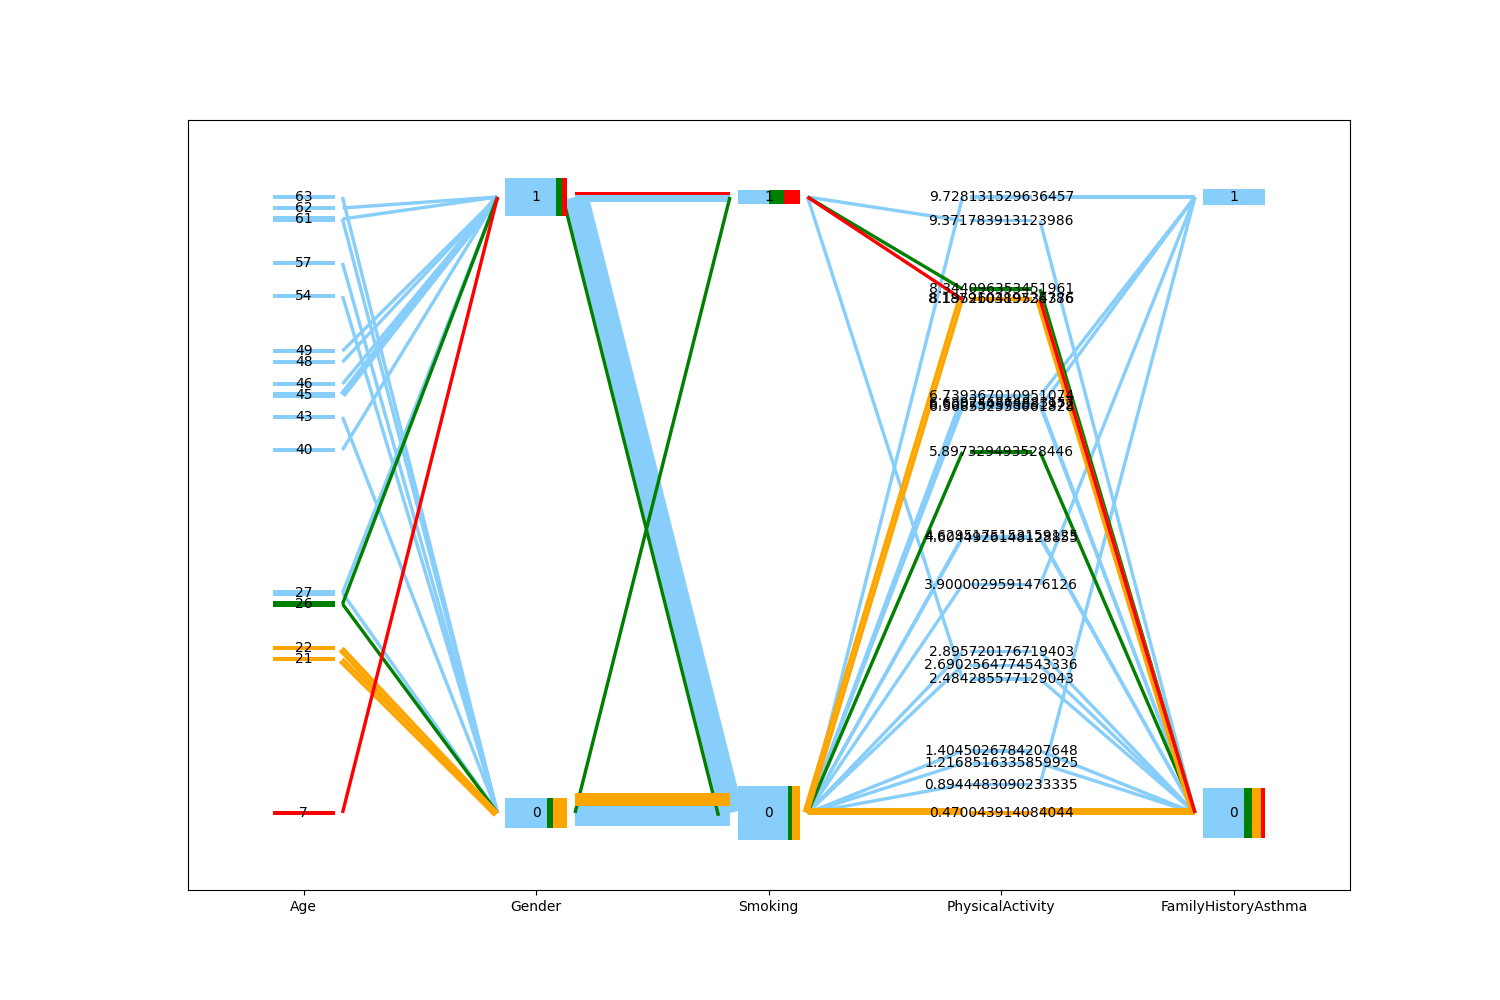

In [136]:
# highlight - modified colours
filename = "highlight_colours.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    hi_var = "Age",
    hi_value=[7, 21, 22, 26],
    color=["red", "orange", "orange", "green"],
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Colours Test", filename)

## Different default colour


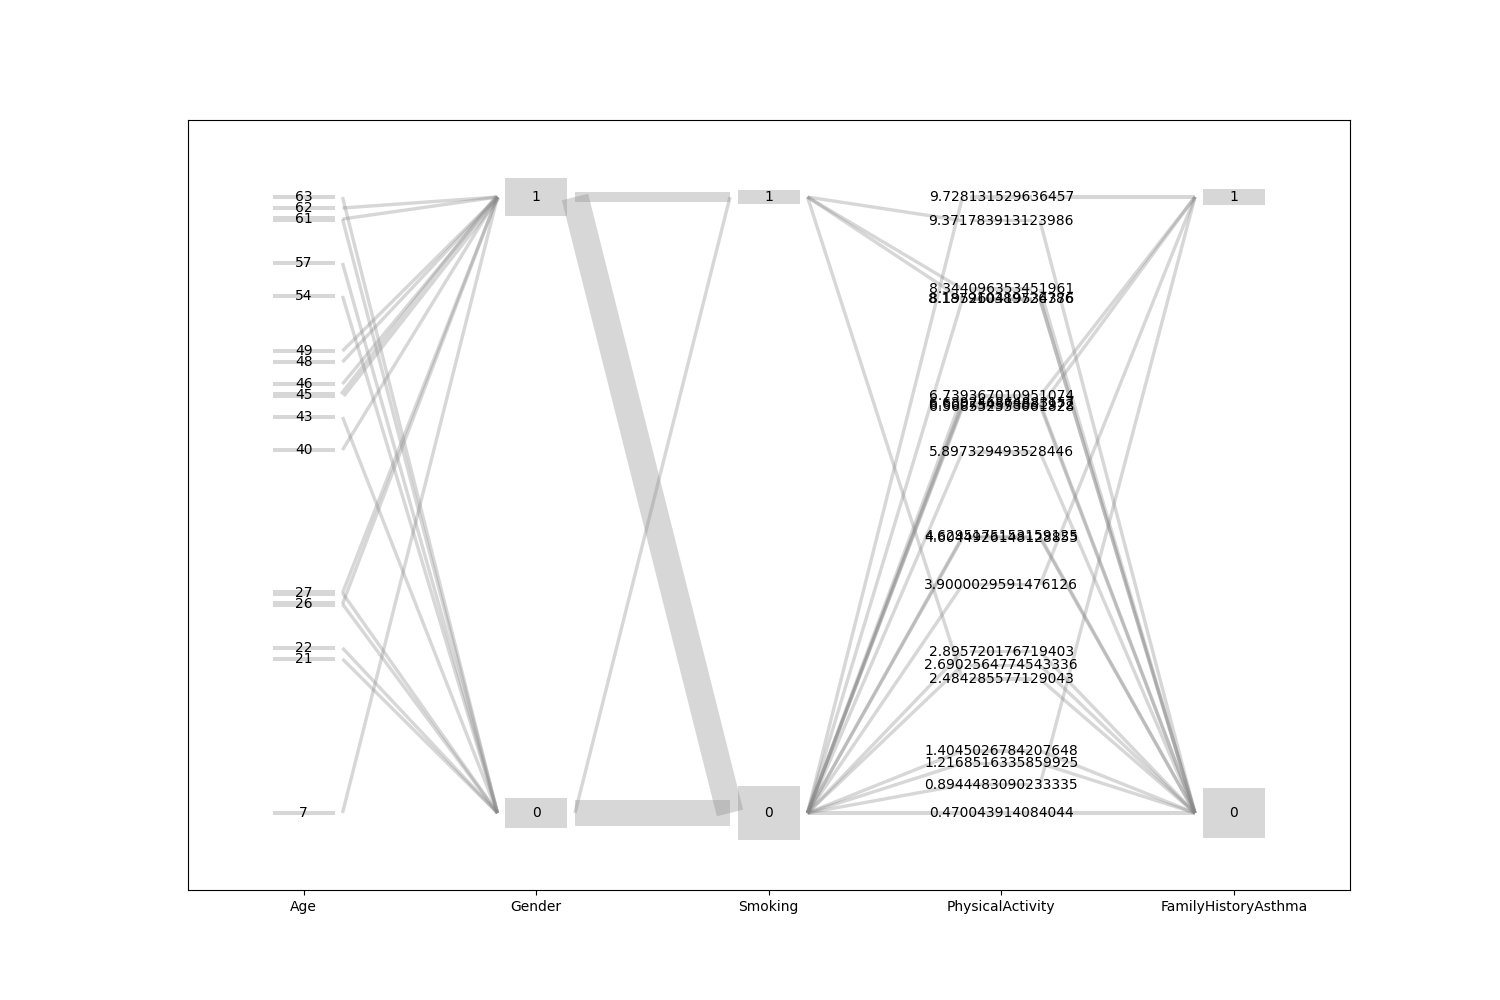
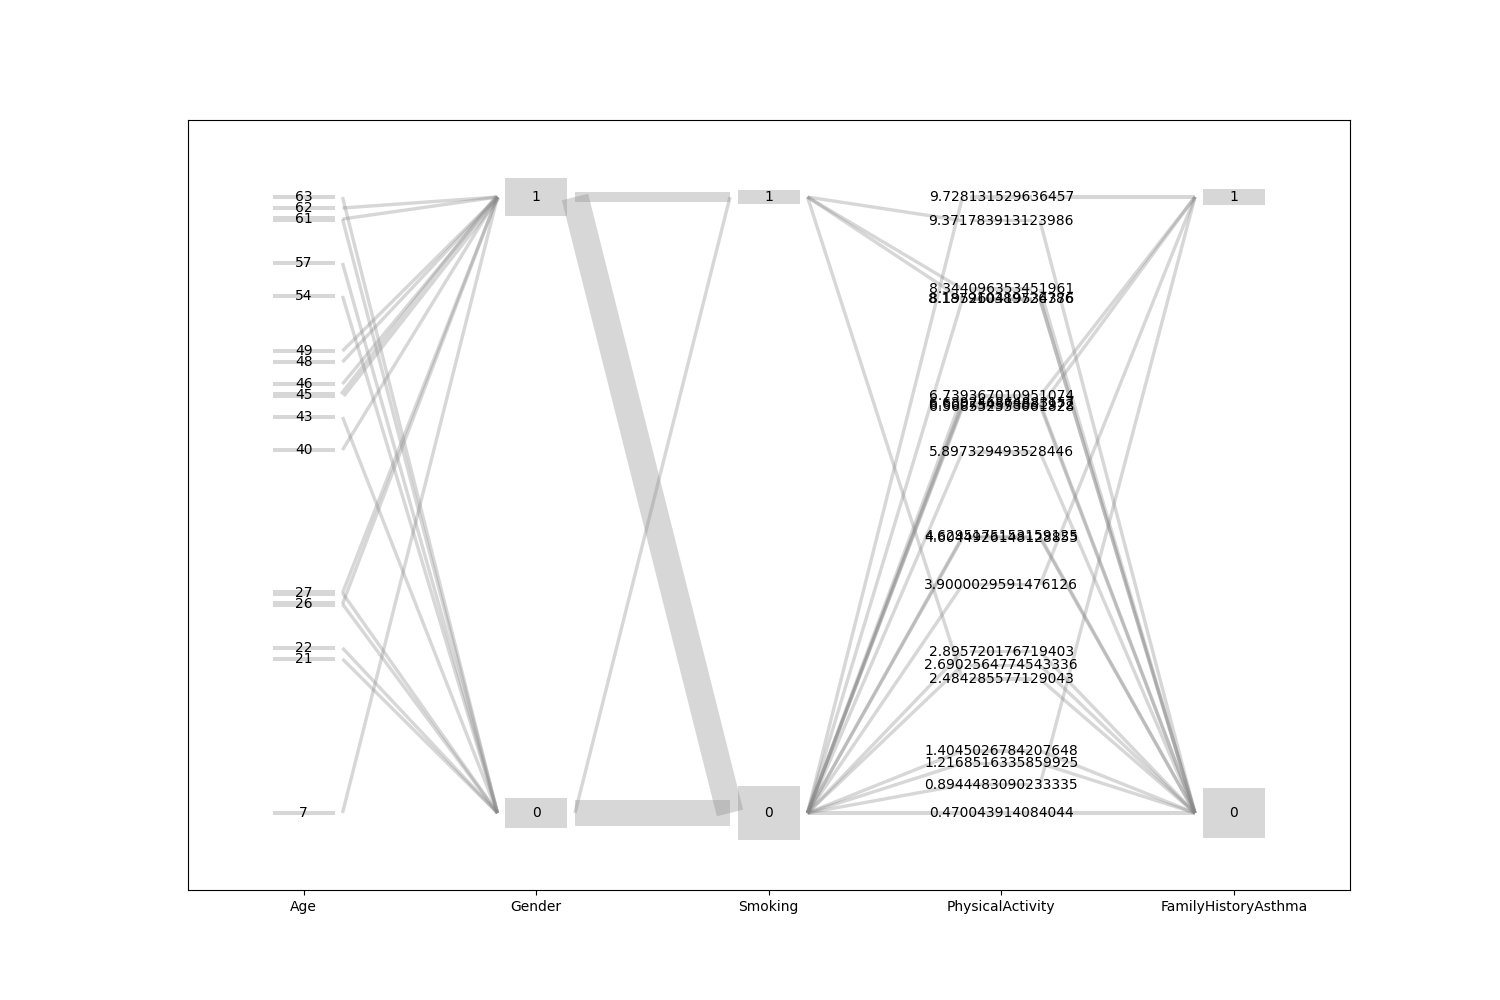

In [137]:
# highlight - modified default colour
filename = "default_colour.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    default_color="#88888855",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Default Colour Test", filename)

# Spacing & Layout tests
Test cases involving "spacing and layout" hammock plot methods (following the categories in README.md)

## Bar width

In [138]:
# spacing & layout - bar width

## Space between labels

In [139]:
# spacing & layout - space between labels

## Label options

In [140]:
# spacing & layout - label options (matplotlib)

## Plot height

In [141]:
# spacing & layout - plot height

## Plot width

In [142]:
# spacing & layout - plot width

## Min bar width

In [143]:
# spacing & layout - min bar width

# Other tests
Test cases involving "other" hammock plot methods (following the categories in README.md)

## Shape


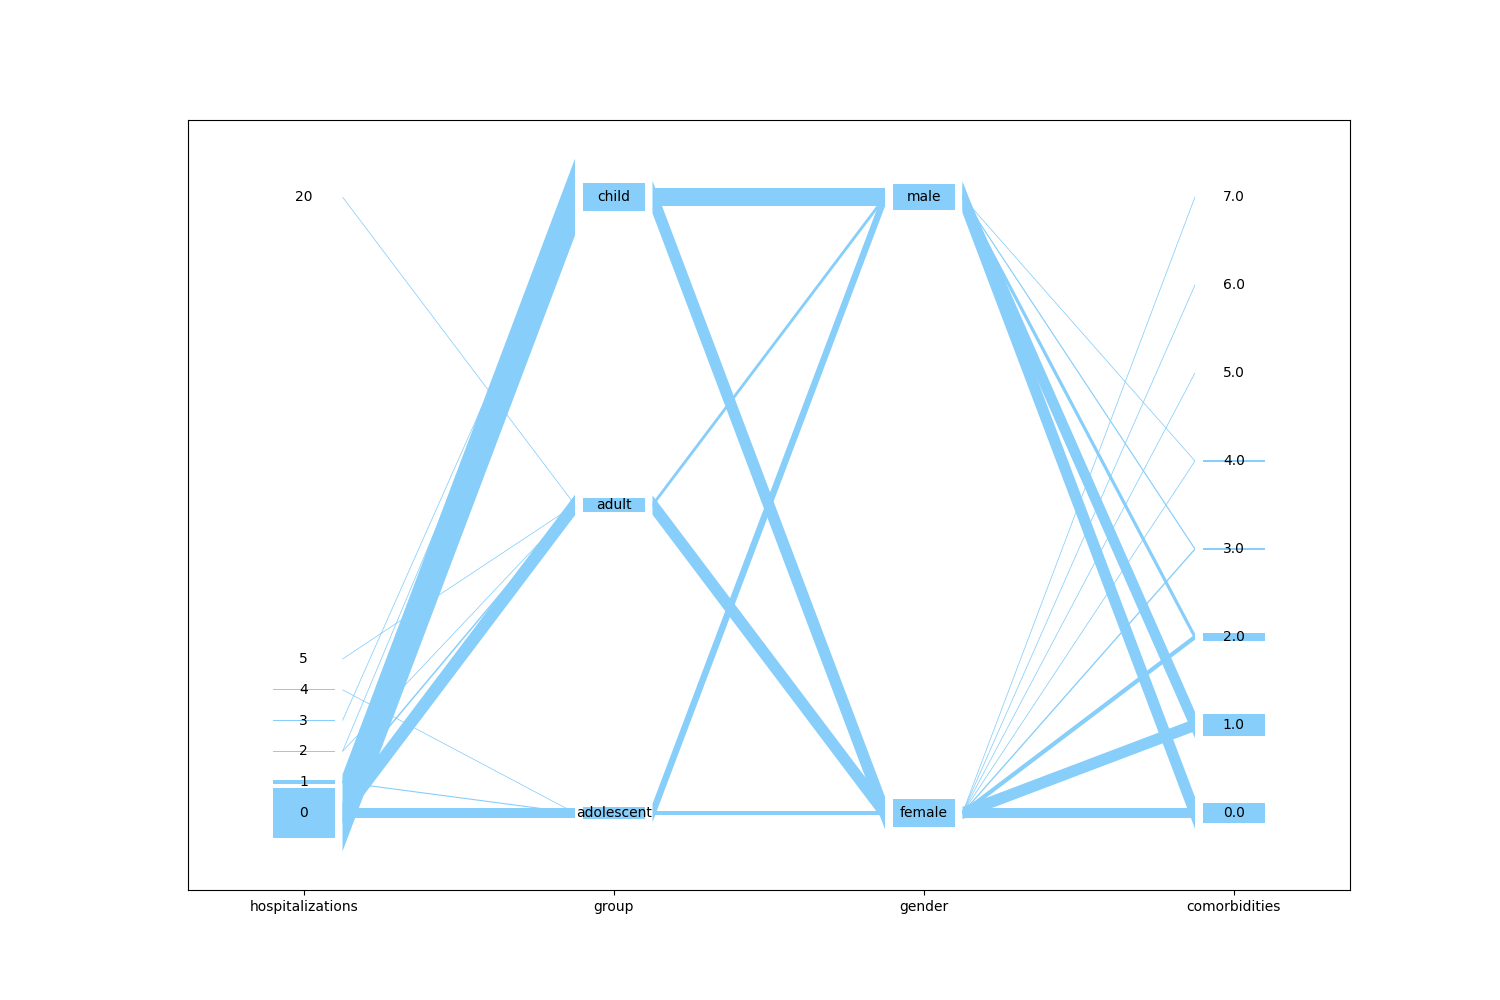
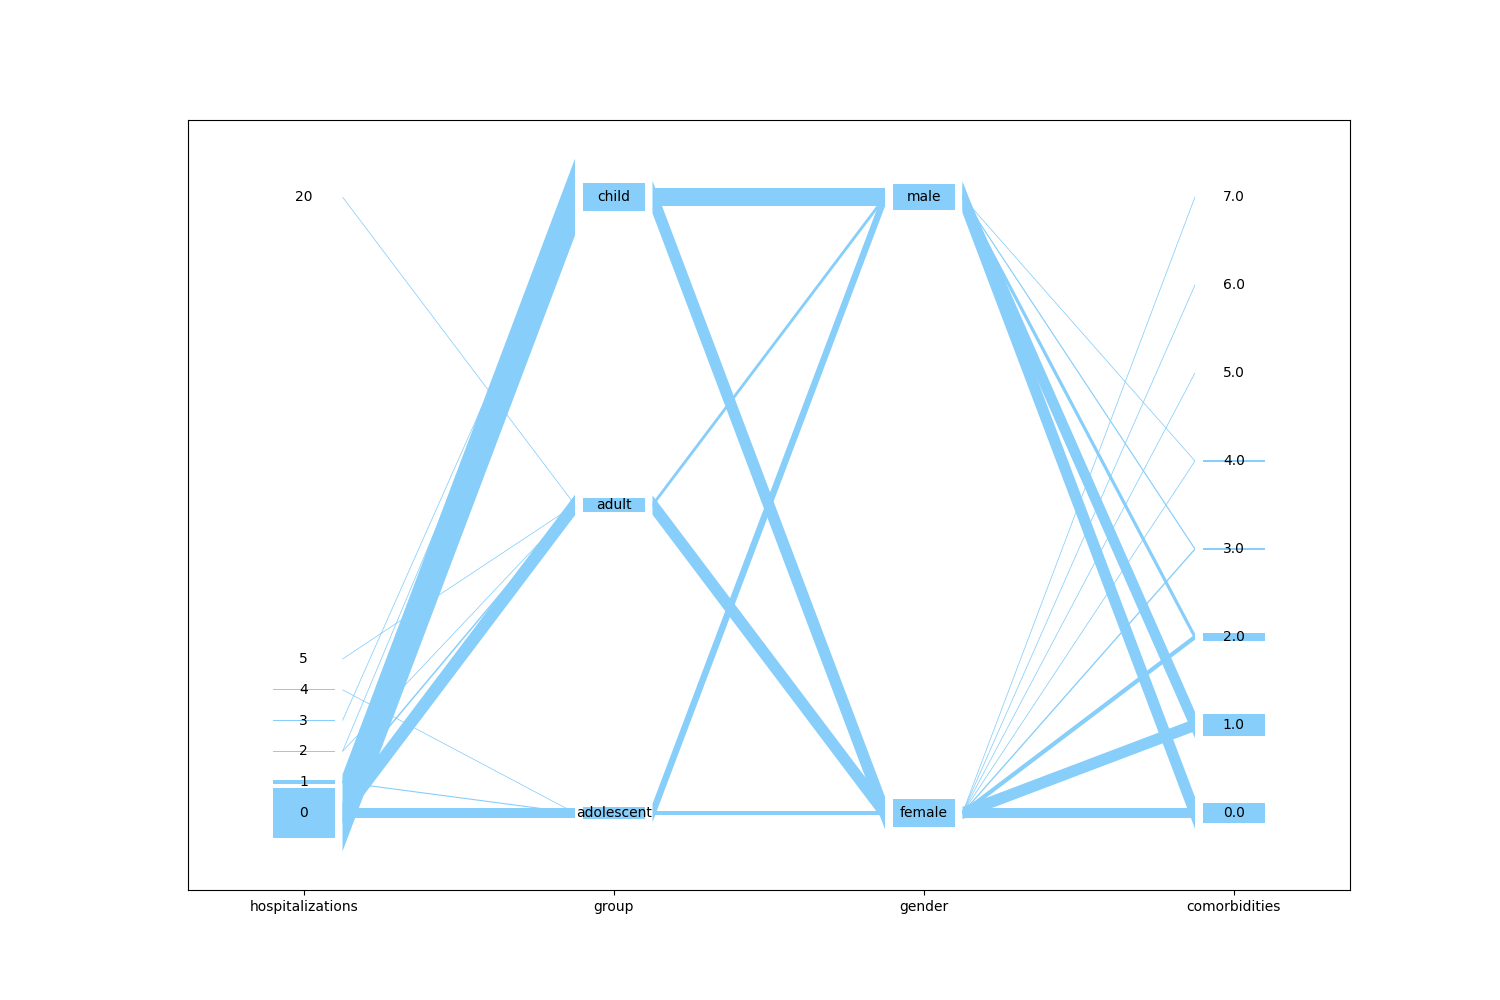

In [144]:
# other - shape
filename = "shape.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    shape="parallelogram",
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Same scale


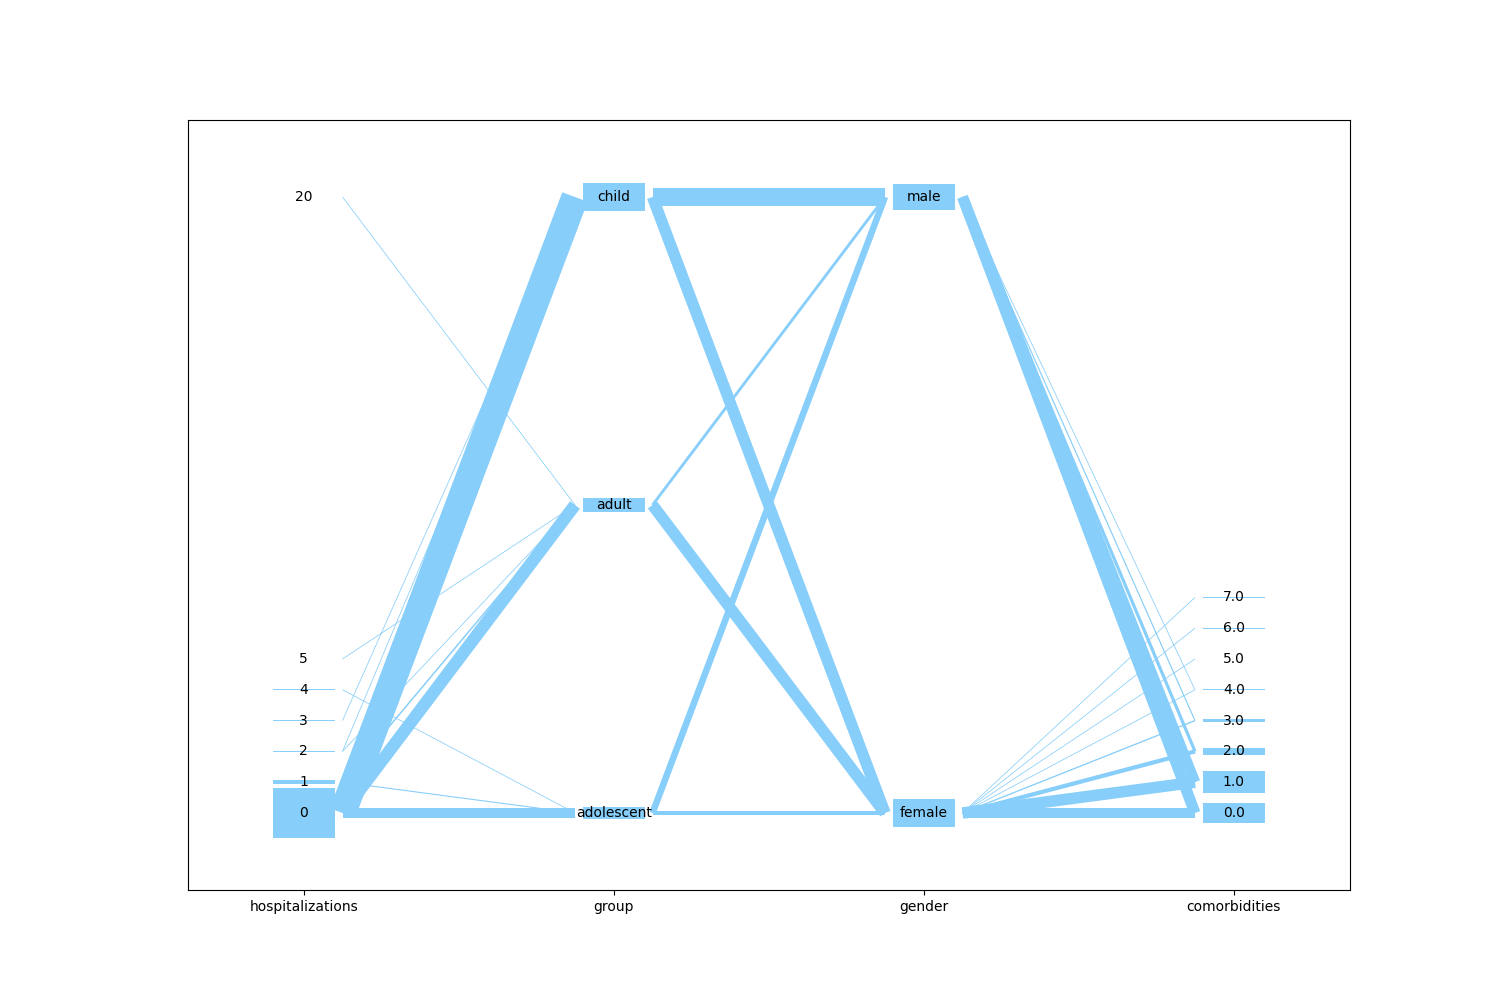
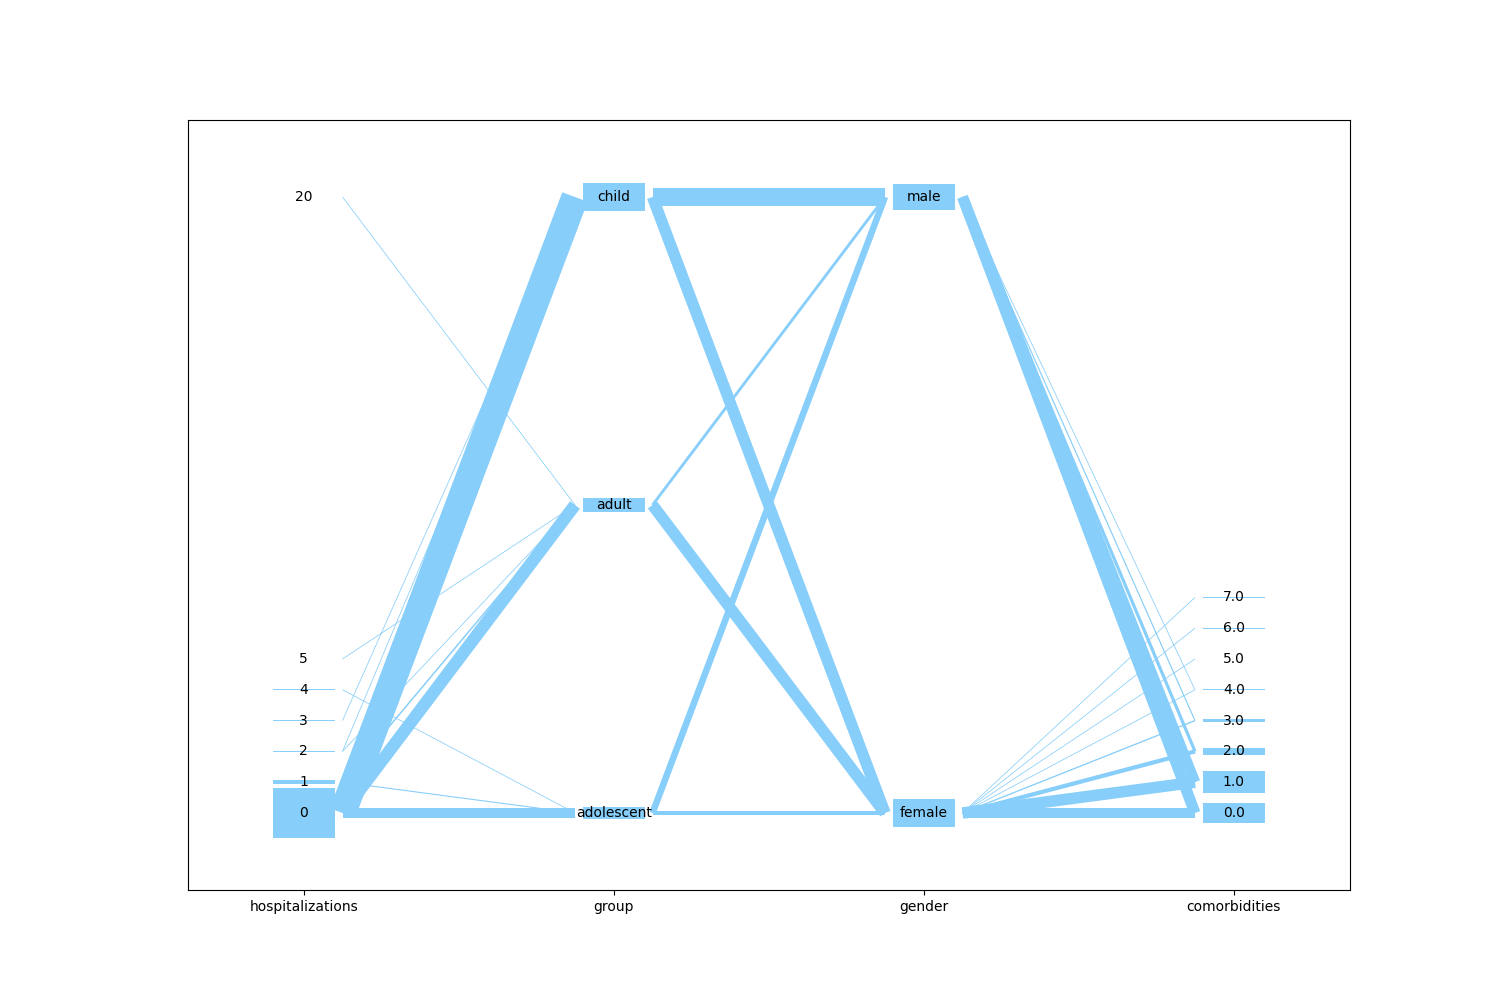

In [145]:
# other - same_scale
filename = "same_scale.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    same_scale=["hospitalizations", "comorbidities"],
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Display figure

<Axes: >

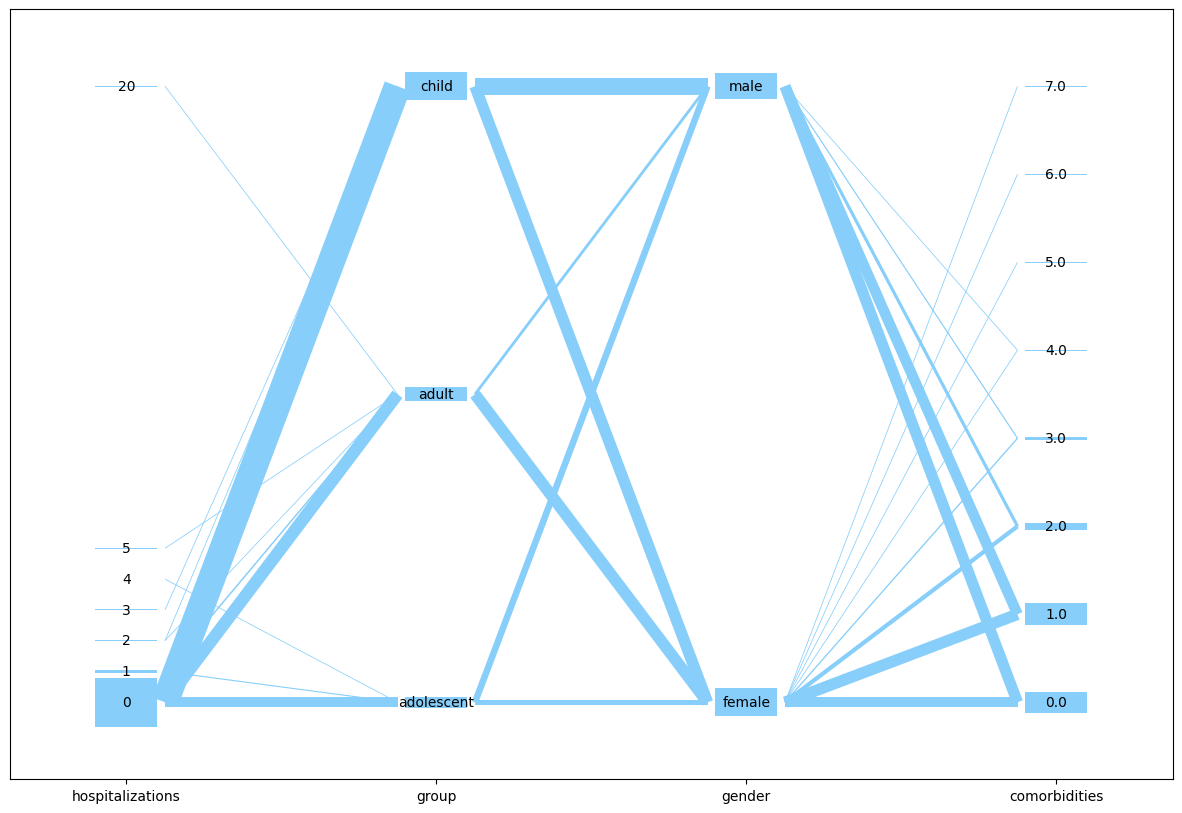

In [146]:
# other - display_figure
# success = figure displays successfully
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    display_figure=True
)